<a href="https://colab.research.google.com/github/PeixotoJr/ADD_Python/blob/main/c4_parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Distribuição**
<hr>

Uma das perguntas mais importantes que podemos fazer sobre os dados é sobre sua distribuição e é um tema central da análise univariada. Você por exemplo já ouviu falar de uma **distribuição normal**. Várias medidas e fenômenos *naturais* seguem essa distribuição como medidas do corpo humano, como altura, peso, o peso de recém nascidos, o peso ou tamanho de sementes etc. Conhecer essa distribuição (basicamente sua média e variância) permite tomarmos  decisões inferindo valores sobre amostras dos dados. Por exemplo, você pode definir a quantidades camisas que serão produzidas de cada tamanho baseada na distribuição da população, ou ajudar a inferir sobre o tamanho mais adequado de embalagens para receberem frutas sortidas de diferentes tamanhos. Mas existem muitos outros tipos de distribuição e não é por acaso que você já ouviu falar de que na origem de muitos dos problemas que enfrentamos está a *distribuição de renda do Brasil*. De fato, a renda no Brasil não segue uma distribuição normal e há muito mais brasileiros na faixa de valores de baixa renda que para faixas maiores. A distribuição neste caso é uma distribuição em calda, e é um dos principais fatores de desigualdade no país. Conhecer essa distribuição ajuda a estabelecer políticas públicas como valores de impostos a serem pagos, benefícios e isensões por faixa de renda, assim como conhecer a distribuição das idades da população por sexo permite estabelecer regras previdenciárias mais justas.

Não está no nosso escopo desenvolver aqui todos os aspectos da análise de distribuições de dados. Para isso há um grande número de bons livros texto de probabilidade e estatística que você pode consultar. Mas podemos fazer aqui uma pequena revisão dos aspectos essenciais da distribuição de dados para os nossos propósitos começando por entender o que são as distribuições de dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

## Probabilidade e Distribuições

Imagine uma caixa com 10 bolas de bilhar, 5 vermelhas, 2 azuis e 3 amarelas. Abaixo você pode ver representada a frequencia, isto é quantidade, de cada uma das cores na caixa.

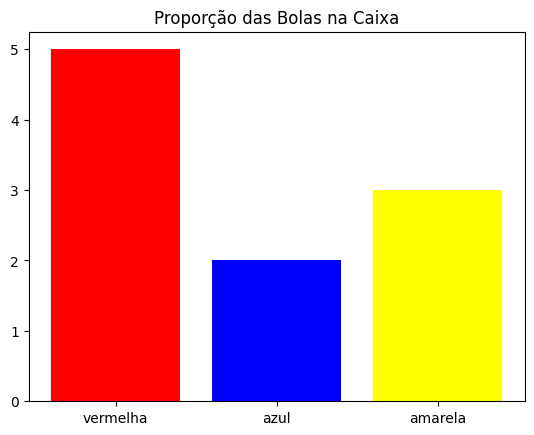

In [2]:
import matplotlib.pyplot as plt

plt.bar(['vermelha','azul','amarela'],[5,2,3], color=['red','blue','yellow'])
plt.title('Proporção das Bolas na Caixa')
plt.show()

Imagine agora que você vai tirar uma bola da caixa sem olhar para bola que irá retirar. Qual cor você imagina será mais provável retirar da caixa?
Se você respondeu *vermelha* você certamente já tem a intuição do que é a probabilidade de um evento. A probabilidade, em uma perspectiva  *frequentista*, considera a frequencia (as quantidades) que ocorrem de cada valor, sendo o caso mais provável a cor que aparece em maior proporção. No caso do nosso exemplo, a probabilidade de você tirar cada uma das cores é simplesmente:

$$ p(X=vermelha) = \frac{\text{bolas vermelhas}}{\text{total de bolas}} = 5/10 = 0.5  $$

$$ p(X=azul) = \frac{\text{bolas azuis}}{\text{total de bolas}} = 2/10 = 0.2  $$

$$ p(X=amarela) = \frac{\text{bolas amarelas}}{\text{total de bolas}} = 3/10 = 0.3  $$

E podemos então dizer que a probabilidade de um evento, um valor $x_i$, é dada por:

$$ p(X=x_i) = \frac{\text{nr de casos de } x_i}{\text{nr de todos casos possíveis}} $$

Você pode notar que a soma da probabilidade de todos os casos é 1.

$$ p(X=vermelha) + p(X=azul) + p(X=amarela) = 0.5 + 0.3 + 0.2 = 1  $$

Este é um resultado geral sobre probabilidades:

$$ \sum_i^n p(X=x_i) = 1 $$

De forma semelhante ao que fizemos com as quantidades,  podemos representar a *proporção* ou a probabilidade de cada cor, dividindo a frequencia de cada cor pelo total de bolas na caixa.

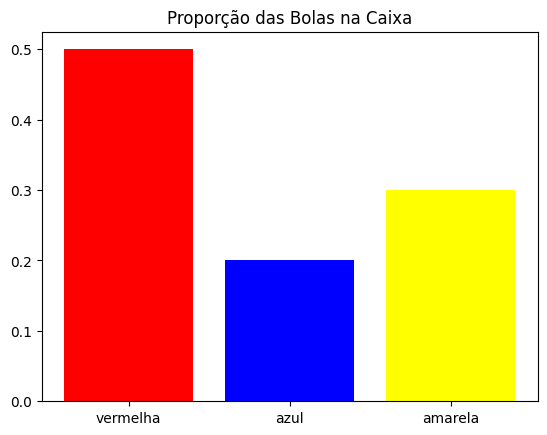

In [3]:
import matplotlib.pyplot as plt

plt.bar(['vermelha','azul','amarela'],[5/10,2/10,3/10], color=['red','blue','yellow'])
plt.title('Proporção das Bolas na Caixa')
plt.show()

Você acaba de descobrir uma **função de distribuição de probabilidades** e o gráfico acima á um gráfico de distribuição de probabilidades.

## Distribuições de Probabilidade

As distribuições de probabilidade são um conceito fundamental em estatística. Para dados univariados, funções de distribuição de probabilidades fornecem um modelo de distribuição dos dados que desempenham um papel fundamental no cálculo de intervalos de confiança, testes de hipóteses, inferências estatísticas, simulações etc.

A definição matemática de uma **função de probabilidade discreta**, $p(x)$, é uma função com as seguintes propriedades:

1. Fornece $p(x_i)$ a probabilidade de que $x_i$ possa assumir um determinado valor:

$$ P[ X = x_i ] = p(x_i) $$

2. $p(x)$ é não negativo para todo valor $x$.

$$ p(x_i) \ge 0 \text{ , para } \forall i$$

3. A soma de $p(x)$ para todos os valores possíveis de $x_i$ é 1

$$ \sum_i p(x_i) = 1$$

E como consequência de 2. e 3. temos $0 \le p(x_i) \le 1$ para $\forall i$.

Pelo nosso exemplos da caixa com bolas coloridas é exatamente o que você esperava encontrar, não é?

Uma função de probabilidade discreta é um função que pode assumir um número discreto de valores (não necessariamente finitos). No nosso exemplo, existem somente 3 casos correspondentes às 3 cores na caixa. Mas de modo análogo podemos **definir funções de probabilidades contínuas** e suas correspondentes distribuições.

$$ P[ a \le x \le b ] = \int_a^b p(x) $$

$$ p(x) \ge 0 \text{ , para } \forall x$$

$$ \int_{-\infty}^{+\infty} p(x) = 1$$

Para essas funções $P(x)$ podemos criar gráficos que são bastante úteis para entendermos os dados.

Um gráfico que exibe a probabilidade $P(X=x)$ para cada valor de $x$ é um **gráfico de densidade de probabilidade** e ainda é comum empregarmos um **gráfico de densidade de probabilidade acumulada** exibindo os valores de $P(X \le x)$ para todo $x$. Essas funções são normalmente conhecidas como **PDF** (do inglês, Probability Density Function) e **CDF** (do inglês, Cumulative Density Function).

É importante você notar que, assim como no caso discreto, em que a somatória de todos os valores de probabilidade possíveis é 1, para o caso contínuo, $ \int_{-\infty}^{+\infty} p(x) = 1$, isso significa que a área sob a curva da PDF tem valor 1.

Se você tem alguma familiaridade com funções de probabilidade de cursos de probabilidade e estatística pode achar útil os gráficos abaixo. Eles resumem o uso dessas funções PDF e CDF para uma distribuição discreta (binomial) e uma distribuição contínua (distribuição normal) e você pode reconhecer o limites empregados para obter as diferentes probabilidades de um intervalo de valores. Há ainda os gráficos de probabilidade acumulada inversa que permitem obter os valores a partir de uma probabilidade dada.

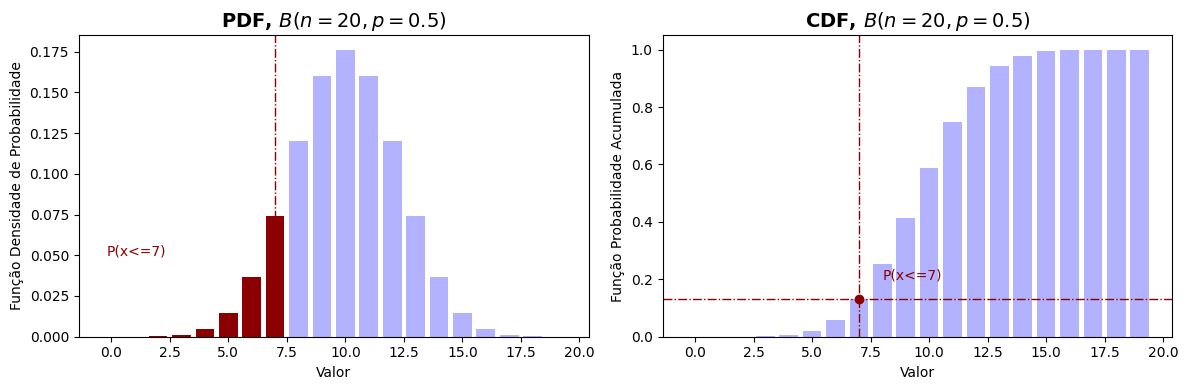

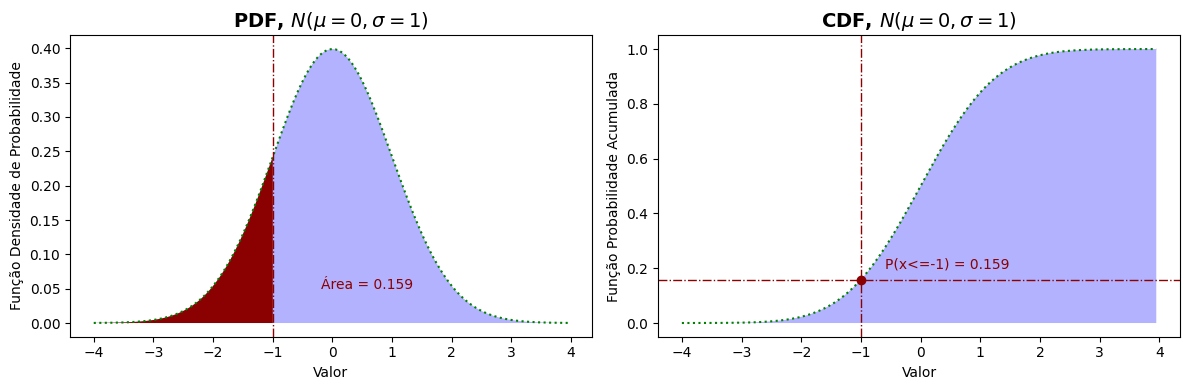

In [4]:
from scipy.stats import norm, binom

n = 20
p = 0.5
x = np.arange(0,n,1)

prob = []
for xi in x:
  prob.append(binom.pmf(n=n,p=p,k=xi))

fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.bar(x,prob,color='blue',linewidth=1.5, alpha=0.3)
plt.xlabel('Valor')
plt.ylabel('Função Densidade de Probabilidade')
plt.title('PDF, $B(n=20, p=0.5)$', fontsize=14, weight='bold')

plt.bar([0,1,2,3,4,5,6,7],height=[prob[i] for i in range(8)],color='darkred')
plt.axvline(7,linewidth=1,linestyle='-.',color='darkred')
plt.text(-0.2, 0.05, f'P(x<=7)', fontsize=10,color='darkred')

prob =[ ]

for xi in x:
  prob.append(binom.cdf(n=n,p=p,k=xi))

plt.subplot(1, 2, 2)
plt.bar(x,prob,color='blue',linewidth=1.5,linestyle=':', alpha=0.3)
plt.xlabel('Valor')
plt.ylabel('Função Probabilidade Acumulada')
plt.title('CDF, $B(n=20, p=0.5)$', fontsize=14, weight='bold')

plt.axvline(7,linewidth=1,linestyle='-.',color='darkred')
plt.axhline(binom.cdf(n=n,p=p,k=7), linewidth=1,linestyle='-.',color='darkred')
plt.plot(7, binom.cdf(n=n,p=p,k=7),'o',color='darkred')
plt.text(8, 0.2, f'P(x<=7)', fontsize=10,color='darkred')

plt.tight_layout()
plt.show()

prob = []

x =  np.arange(-4,4,0.05)

for xi in x:
  prob.append(norm.pdf(xi))

fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(x,prob,c='green',linewidth=1.5,linestyle=':')
plt.fill_between(x,prob, facecolor='blue', alpha=0.3)
plt.fill_between(np.arange(-4,-0.95,0.05), prob[0:len(np.arange(-4,-0.95,0.05)+1)], facecolor='darkred')
plt.xlabel('Valor')
plt.ylabel('Função Densidade de Probabilidade')
plt.title('PDF, $N(\mu=0, \sigma=1)$', fontsize=14, weight='bold')

plt.axvline(-1,linewidth=1,linestyle='-.',color='darkred')
plt.text(-0.2, 0.05, f'Área = { norm.cdf(-1) :.3f}', fontsize=10,color='darkred')

prob =[ ]

for xi in x:
  prob.append(norm.cdf(xi))

plt.subplot(1, 2, 2)
plt.plot(x,prob,c='green',linewidth=1.5,linestyle=':')
plt.fill_between(x,prob, facecolor='blue', alpha=0.3)
plt.xlabel('Valor')
plt.ylabel('Função Probabilidade Acumulada')
plt.title('CDF, $N(\mu=0, \sigma=1)$', fontsize=14, weight='bold')

plt.axvline(-1,linewidth=1,linestyle='-.',color='darkred')
plt.axhline(norm.cdf(-1), linewidth=1,linestyle='-.',color='darkred')
plt.plot(-1,norm.cdf(-1),'o',color='darkred')
plt.text(-0.6, 0.2, f'P(x<=-1) = { norm.cdf(-1) :.3f}', fontsize=10,color='darkred')

plt.tight_layout()
plt.show()


### Exemplo

Este exemplo mostra como esses gráficos podem ser empregados para uma aproximação de inferências estatísticas que podem, em seguida, serem refinadas com a obtenção dos valores exatos das probabilidades ou valores, que é um uso bastante prático das visualizações.

Sabendo que a média de peso de recém nascidos é de 3kg com um desvio padrão de 1Kg, podemos empregar isso para determinar a probabilidade de termos bêbes abaixo de 2kg e, assim antecipar e planejar as necessidades de atendimento especial dos recém nascidos (alimentação, maior período de internação etc.).



In [5]:
from IPython.display import display, Math, Latex
p = norm.cdf(2,loc=3,scale=1)

Math('P(x \le 2) = ' +  f'{p :.3f}')

<IPython.core.display.Math object>

O resultado é de cerca de 16% e, portanto, se tivermos 20 nascimentos diários é necessário estarmos preparados para atender até 4 nascimentos requerendo cuidados especiais.

Nosso objetivo aqui é apenas mostrar como essa probabilidade pode ser observada nos gráficos de distribuição de probabilidades e de probabilidade acumulada mesmo antes de você fazer o cálculo das probabildades e valores!



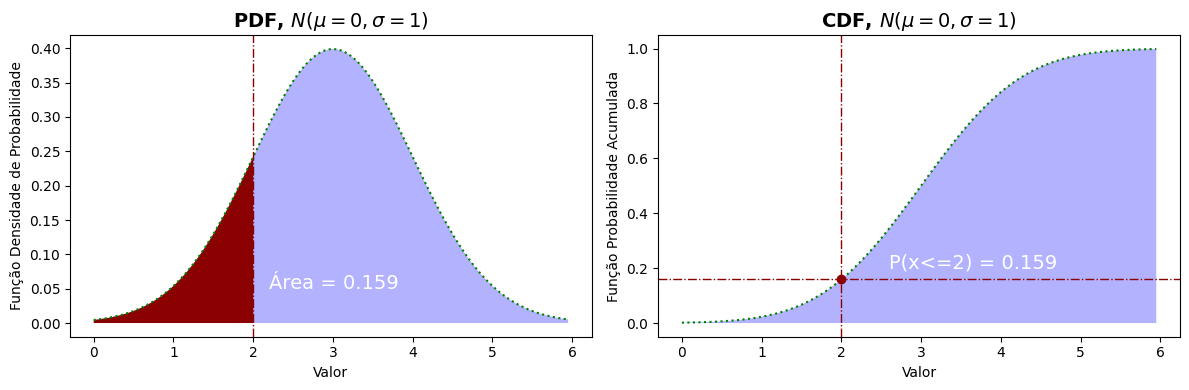

In [6]:
media = 3
sd = 1

prob = []

x =  np.arange(0,media+3*sd,0.05)

for xi in x:
  prob.append(norm.pdf(xi, loc=media, scale=sd))

fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(x,prob,c='green',linewidth=1.5,linestyle=':')
plt.fill_between(x,prob, facecolor='blue', alpha=0.3)
plt.fill_between(np.arange(0,2.05,0.05), prob[0:len(np.arange(0,2.05,0.05)+1)], facecolor='darkred')
plt.xlabel('Valor')
plt.ylabel('Função Densidade de Probabilidade')
plt.title('PDF, $N(\mu=0, \sigma=1)$', fontsize=14, weight='bold')

plt.axvline(2,linewidth=1,linestyle='-.',color='darkred')
plt.text(2.2, 0.05, f'Área = { norm.cdf(-1) :.3f}', fontsize=14,color='w')

prob =[ ]

for xi in x:
  prob.append(norm.cdf(xi, loc=media, scale=sd))

plt.subplot(1, 2, 2)
plt.plot(x,prob,c='green',linewidth=1.5,linestyle=':')
plt.fill_between(x,prob, facecolor='blue', alpha=0.3)
plt.xlabel('Valor')
plt.ylabel('Função Probabilidade Acumulada')
plt.title('CDF, $N(\mu=0, \sigma=1)$', fontsize=14, weight='bold')

plt.axvline(2,linewidth=1,linestyle='-.',color='darkred')
plt.axhline(norm.cdf(2, loc=media, scale=sd), linewidth=1,linestyle='-.',color='darkred')
plt.plot(2,norm.cdf(2, loc=media, scale=sd),'o',color='darkred')
plt.text(2.6, 0.2, f'P(x<=2) = { norm.cdf(2, loc=media, scale=sd) :.3f}', fontsize=14,color='w')

plt.tight_layout()
plt.show()


Você pode entender então que, de modo análogo, observando as respectivas distribuições de probabilidade poderíamos responder de modo aproximados muitas perguntas como:

* Qual a razão (probabilidade) de brasileiros com renda abaixo de 3 mínimos?
* Que valor de renda média deveria ser empregado para criar um benefício de isenção abrangendo 85% da população?
* Qual a nota de corte de um exame vestibular para abranger 75% dos melhores candidatos?
* Qual a probabilidade de termos um dispositivo com falha em um tempo abaixo do seu tempo médio de vida?

Não trabalharemos aqui com o cálculo dessas probabilidades, mas a visualização da distribuição dos dados e das distribuições de probabilidade, fornece uma primeira visão desses valores que podem, em seguida, serem calculados caso haja um modelo de distribuição, e a visualização permite entendermos esses valores mesmo quando não são conhecidas as distribuições de probabilidade, o que ocorre em muitos casos.

Se você tiver interesse também em como obter os cálculos de probabilidades feitos aqui pode consultar a documentação do pacote `SciPy`. Para nós essa introdução de conceitos já será bastante suficente.

## Histogramas e Gráficos de Densidade

Em princípio esses são ambos gráficos que exibem distribuições dos dados. O  primeiro exibe a frequencia absoluta (as quantidades) de classes de valores dos dados. As classes de valores são um número discreto e as quantidades são, então, representadas por faixas (barras) verticais ou horizontais. É importante que você não confunda os histogramas com gráficos de barras, o que é um erro bastante comum.  Gráficos de barras são mais gerais e podem representar outras quantidades que não uma faixa de valores e suas frequências, incluindo relacionar variáveis diferentes. Um histograma, por outro lado, representa uma única variável em duas dimensões, seus valores e frequencias.

O `Matplotlib` emprega a função `plt.hist()` para construir tanto histogramas como gráficos de densidade de probabilidade (PDF).

### Atrasos Aéreos

Vamos ver aqui um conjunto de dados de vôos e tempos de atraso ou antecipação das chegadas. Por simplicidade vamos nos referir a atraso das chegadas (`arr_delay`) independente do valor ser positivo (atraso) ou negativo (antecipação da chegada).

In [7]:
flights = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/flights_delays_2015.csv')
flights.head()


,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,12.0,United Air Lines Inc.
3,7.0,United Air Lines Inc.
4,-14.0,United Air Lines Inc.


In [8]:
flights['arr_delay'].describe()

,arr_delay
count,297001.000000
mean,1.282629
std,28.880222
min,-60.000000
25%,-17.000000
50%,-6.000000
75%,11.000000
max,120.000000


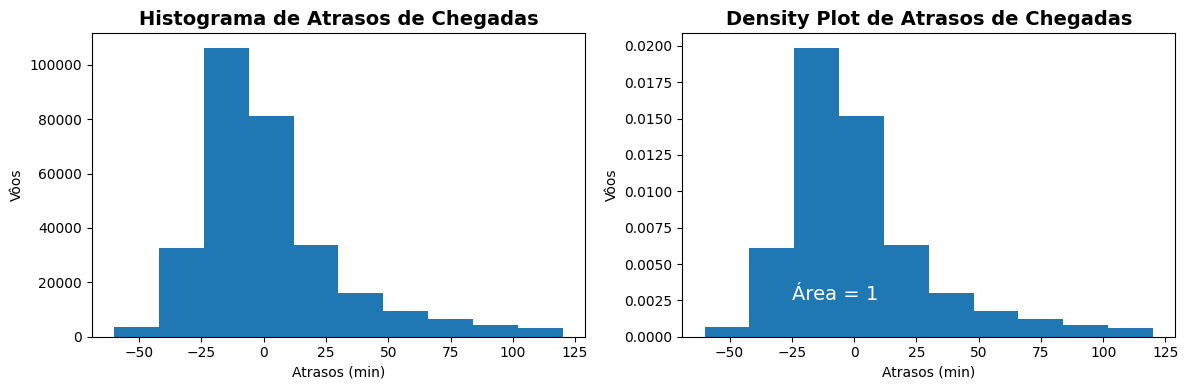

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(flights['arr_delay'])

# Anotações
plt.title('Histograma de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.subplot(1,2,2)
plt.hist(flights['arr_delay'],density='True')

# Anotações
plt.title('Density Plot de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.text(-25,0.0025,'Área = 1',c='white',fontsize=14)

plt.tight_layout()
plt.show()

Ambos os gráficos acima exibem a mesma forma. Mas o primeiro apresenta no eixo `y` a frequência (quantidade absoluta) dos vôos para as respectivos faixas de atraso das chegadas do eixo `x`. Como o parâmetro `density=True` o gráfico exibe a mesma forma, mas os valores são reescalados de forma que a área abaixo do gráfico tenha valor 1 representando, assim, a razão ou a densidade de probabilidade dos valores.

Em quaisquer casos fica evidente uma **distribuição com assimetria negativa** ou *calda à direita*, com valores mais concentrados à esquerda o que, em geral, nos diz que a média dos dados é menor que sua mediana.

Você também pode observar que existe uma quantidade maior de vôos com chegada antecipada que com atrasos e, embora não vamos calcular essa probabilidade, a probabilidade de chegarmos adiantados no nosso destino é maior que a de chegarmos com atraso.

Várias outras análises podem ser feitas somente observando o gráfico de distribuição e, se necessário, pode-se então refinar essas análises buscando-se o cálculo das probabilidades.



Acima empregamos deixamos que o `Matplotlib` define-se as classes de valores a serem exibidas. Mas você pode empregar o parâmetro `bins` para definir uma quantidade de classes como abaixo.

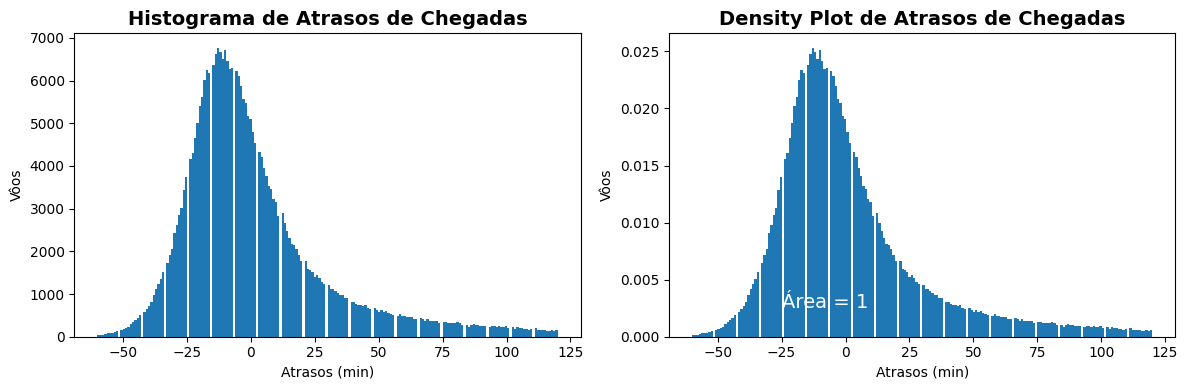

In [10]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(flights['arr_delay'],bins=200)

# Anotações
plt.title('Histograma de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.subplot(1,2,2)
plt.hist(flights['arr_delay'],density='True',bins=200)

# Anotações
plt.title('Density Plot de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.text(-25,0.0025,'Área = 1',c='white',fontsize=14)

plt.tight_layout()
plt.show()

Se no lugar de definir a quantidade de intervalos você quiser definir o tamanho da faixa de intervalos a ser empregada o procedimento já não é tão direto.

Isso pode ser feito de modo prático dividindo-se o intervalo total de valores pela medida do intervalo de valores desejado. Vamos esse procedimento no exemplo a seguir.

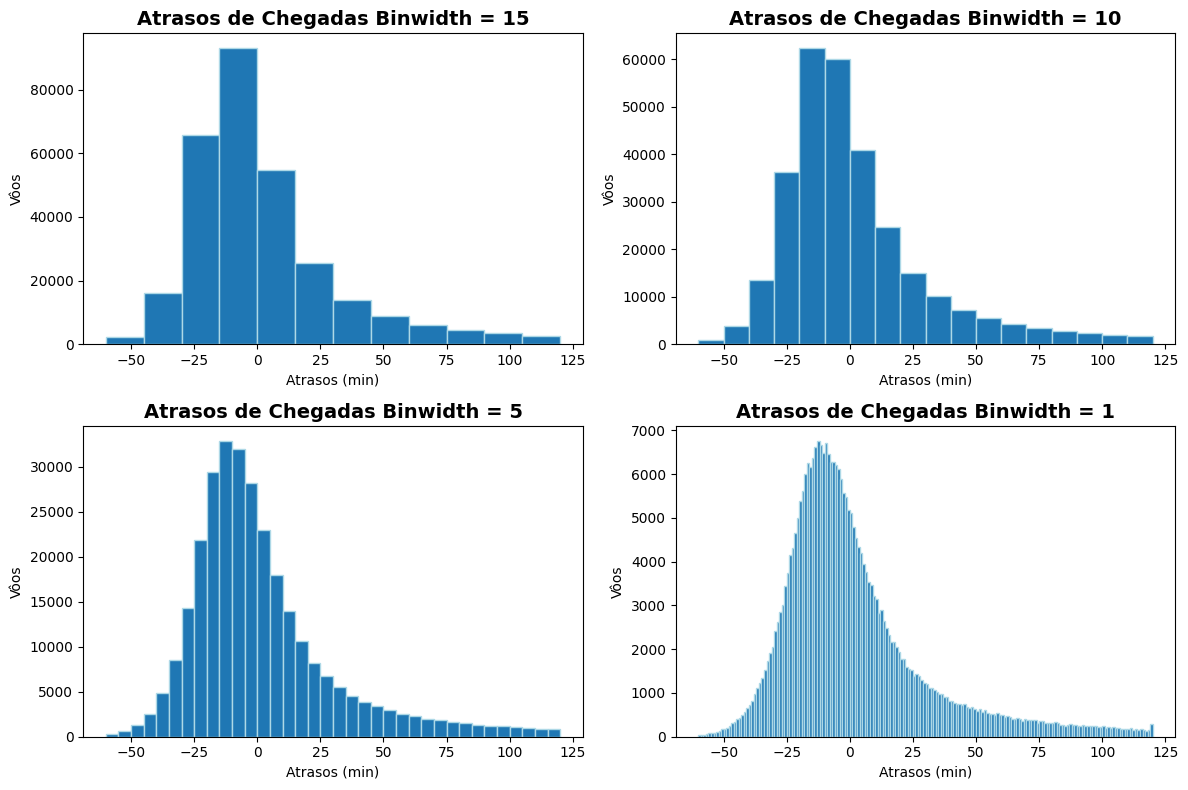

In [11]:
plt.figure(figsize=(12,8))

for i, binwidth in enumerate([15, 10, 5, 1]):
  plt.subplot(2, 2, i + 1)

  interval = flights['arr_delay'].max() - flights['arr_delay'].min()
  plt.hist(flights['arr_delay'],bins=int(interval/binwidth),edgecolor = 'lightblue')

  # Anotações
  plt.title('Atrasos de Chegadas Binwidth = %d' % binwidth, fontsize=14, weight='bold')
  plt.xlabel('Atrasos (min)')
  plt.ylabel('Vôos')

plt.tight_layout()
plt.show()

Os `bins` correspondem a quantidade dos intervalos de valores que estamos interessados. A medida que aumentamos a quantidade de intervalos o gráfico de barras se aproxima de um gráfico de valores contínuos.

Você também pode definir `bins` com intervalos de diferentes tamanhos, e fica evidente nos gráficos abaixo a maior probabilidade de vôos adiantados que com atraso. Neste caso você não pode esperar a mesma forma nos dois gráficos.

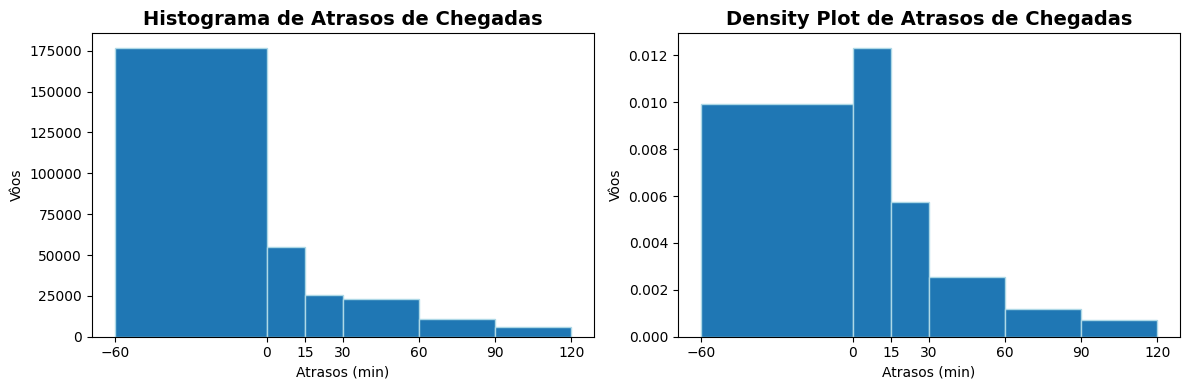

In [12]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(flights['arr_delay'],bins=[-60,0,15,30,60,90,120],edgecolor = 'lightblue')

# Anotações
plt.title('Histograma de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.xticks([-60,0,15,30,60,90,120])

plt.subplot(1,2,2)
plt.hist(flights['arr_delay'],density='True',bins=[-60,0,15,30,60,90,120],edgecolor = 'lightblue')

# Anotações
plt.title('Density Plot de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.xticks([-60,0,15,30,60,90,120])

plt.tight_layout()
plt.show()

## Histograma e Densidade Acumulada

Tanto o histograma como o gráfico de densidade podem ser ainda configurados para serem acumulativos. Isso parece fazer mais sentido para o gráfico de densidade, mas para o histograma é uma forma direta de fornecer resposta a perguntas como *quantos vôos tiveram atraso até 15 min?*

Com o **gráfico de probabilidade acumulada**, mesmo sem fazer o cálculo,  podemos estimar com bastante proximidade a probabilidade de um vôo ter até no máximo 15min de atraso (0.8, ou 80%).


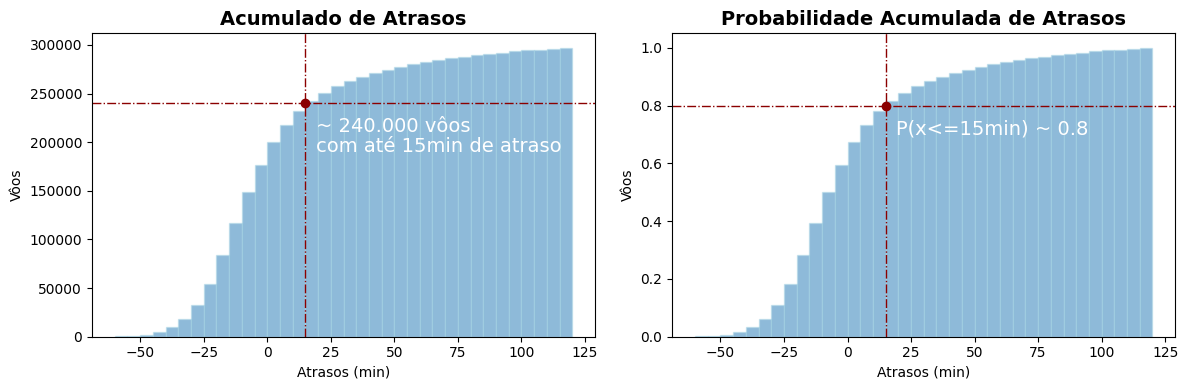

In [13]:
plt.figure(figsize=(12,4))

binwidth=5

plt.subplot(1,2,1)
plt.hist(flights['arr_delay'],bins=int(interval/binwidth),edgecolor = 'lightblue',cumulative=True,alpha=0.5)

plt.axvline(15,linewidth=1,linestyle='-.',color='darkred')
plt.axhline(240000, linewidth=1,linestyle='-.',color='darkred')
plt.plot(15,240000,'o',color='darkred')
plt.text(19, 210000, '~ 240.000 vôos', fontsize=14,color='w')
plt.text(19, 190000, 'com até 15min de atraso', fontsize=14,color='w')

# Anotações
plt.title('Acumulado de Atrasos', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.subplot(1,2,2)
plt.hist(flights['arr_delay'],density='True',bins=int(interval/binwidth),edgecolor = 'lightblue',cumulative=True,alpha=0.5)

# Anotações
plt.title('Probabilidade Acumulada de Atrasos', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.axvline(15,linewidth=1,linestyle='-.',color='darkred')
plt.axhline(0.8, linewidth=1,linestyle='-.',color='darkred')
plt.plot(15,0.8,'o',color='darkred')
plt.text(19, 0.7, 'P(x<=15min) ~ 0.8', fontsize=14,color='w')

plt.tight_layout()
plt.show()

## Adicionando a Estimativa de Densidade do Kernel

Em estatística , a estimativa de densidade do kernel (KDE) é uma forma de estimar a função de densidade de probabilidade de uma variável, e é útil para os casos que não conhecemos essa distribuição. Esse também é um problema fundamental na visualização de dados quando se deseja obter a suavização de linhas com base em uma amostra de dados finita, tendo uma série de aplicações em econometria, processamento de sinais etc.

> $\bigstar \text{  }$ *A estimativa de densidade do kernel (KDE) desempenha um papel fundamental na visualização de dados quando se deseja obter a suavização de linhas com base em uma amostra de dados finita.*

O `Matplotlib` não fornece uma função direta para isso, mas podemos recorrer novamente ao pacote `SciPy` e empregar a função `kde` (Kernel Density Estimation) para fornecer essa aproximação e exibirmos os dados. A função `kde.gaussian_kde()` estima a função de densidade e podemos, do mesmo modo que fizemos no capítulo anterior ao criarmos linhas de tendência, aplicar essa função a um intervalo de valores desejado.



<ipython-input-14-c81fc8b673b6>:2: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  density = kde.gaussian_kde(flights['arr_delay'] )


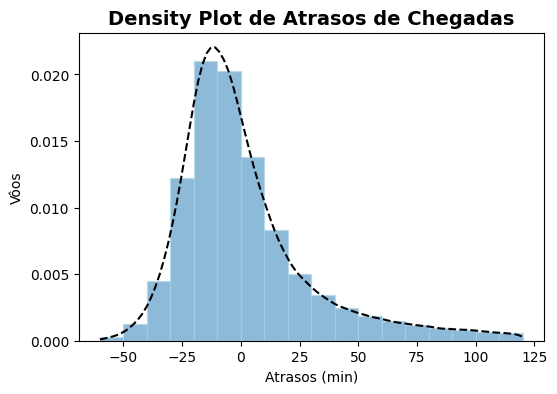

In [14]:
from scipy.stats import kde
density = kde.gaussian_kde(flights['arr_delay'] )
x = np.linspace(-60,120,100)
y = density(x)

plt.figure(figsize=(6,4))

binwidth=10

plt.hist(flights['arr_delay'],density='True',bins=int(interval/binwidth),edgecolor = 'lightblue',alpha=0.5)
plt.plot(x,y,'--k')

# Anotações
plt.title('Density Plot de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.show()

Ao fazermos essas aproximações, entretanto, é importante tomarmos alguns cuidados sobre conclusões sobre essa curva estimada. A curva estimada, buscando uma *suavização* da curva que corresponde aos dados,  pode produzir nos casos em que o valores apresentam um grande *salto*, intervalos de valores que de fato *não existem* nos dados.

Vamos ver um exemplo disso. Sobre os dados de atrasos dos vôos filtramos os valores para eliminar todos os valores menores que zero (chegadas com antecedência), produzindo assim um salto de valores. Isso é bastante razoável se estivermos interessados apenas no atraso dos vôos.



<ipython-input-15-2a78cc675d01>:2: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  density = kde.gaussian_kde(flights[ flights['arr_delay'] > 0]['arr_delay'] )


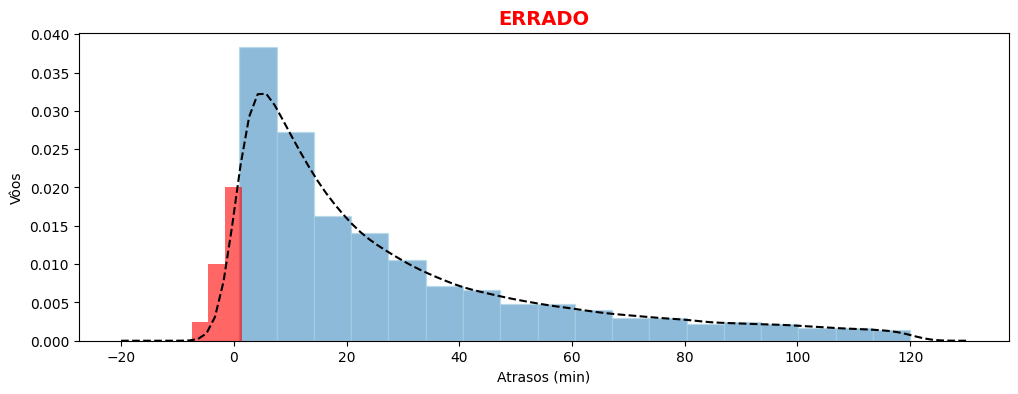

In [15]:
from scipy.stats import kde
density = kde.gaussian_kde(flights[ flights['arr_delay'] > 0]['arr_delay'] )
x = np.linspace(-20,130,100)
y = density(x)

plt.figure(figsize=(12,4))

binwidth=10

plt.hist(flights[ flights['arr_delay'] > 0]['arr_delay'],density='True',bins=int(interval/binwidth),edgecolor = 'lightblue',alpha=0.5)
plt.plot(x,y,'--k')

# Anotações
plt.title("ERRADO", fontsize=14, weight='bold', color='r')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.bar(0,0.02,color='red',width=3,alpha=0.6)
plt.bar(-3,0.01,color='red',width=3,alpha=0.6)
plt.bar(-6,0.0025,color='red',width=3,alpha=0.6)

plt.show()

A linha da curva de densidade de probabilidade estimada neste caso, evitando esse *salto* de valores, aparece como uma linha contínua que se estende para valores < 0 que não existem pois estamos olhando apenas atrasos reais (isto é `arr_delay > 0`). Isso, para muitas aplicações em física, biologia etc. pode representar valores sem qualquer realidade possível. Desse modo, embora o gráfico esteja correto, é necessário também saber interpretá-lo corretamente.

## Distribuições com o pacote `seaborn`

A biblioteca `Seaborn` oferece uma opção direta para estimativa da densidade de kernel. A função `distplot()` agrega todas essas funcionalidades para gráficos em *nível de figura*. Sendo um gráfico em nível de figura, não podemos usar essa função referenciando eixos ou empregar o `subplot()` da interface direta para criar múltiplos plots, sendo necessário empregar um esquema próprio do `Seaborn` de gráficos em *grid* (`facegrid`) que não trataremos aqui. Mas essas mesmas funções estão disponíveis individualmente e podemos igualmente empregá-las para gráficos simples ou múltiplos:

```
histplot() = displot(... kind="hist")
kdeplot() = displot(... kind="kde")
ecdfplot() = displot(... kind="ecdf")
```

> $\bigstar \text{  }$ *Cuidado: O `Seaborn` ainda possui a função `distplot()` (nome muito semelhante ao `displot()`!). Essa função está obsoleta e deve ser removida em futuras versões. Prefira, portanto, a função `displot()`, para uma função de nível de figura ou as funções individuais acima para gráficos no nível dos eixos.*  



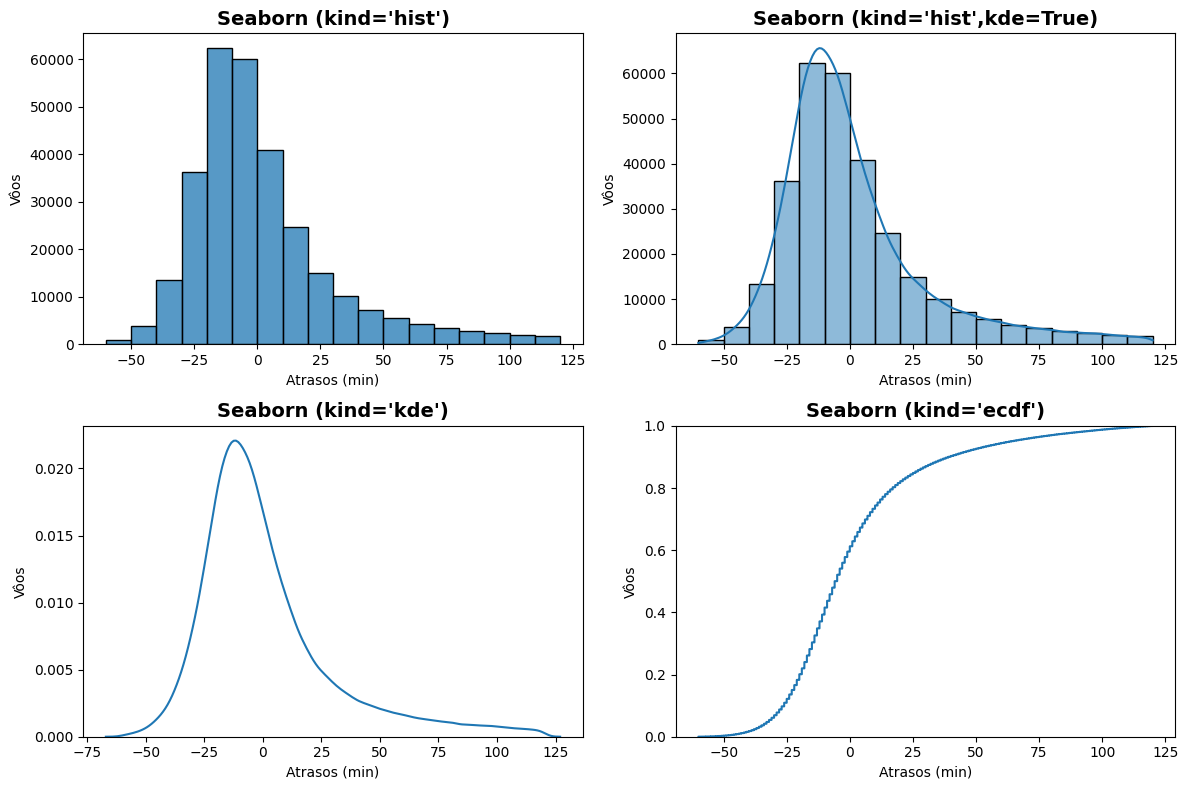

In [16]:
plt.figure(figsize=(12,8))
binwidth=10

plt.subplot(2,2,1)
sns.histplot(data=flights, x='arr_delay', bins=int(interval/binwidth))
plt.title('Seaborn (kind=\'hist\')', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.subplot(2,2,2)
sns.histplot(data=flights, x='arr_delay', bins=int(interval/binwidth), kde=True)
plt.title('Seaborn (kind=\'hist\',kde=True)', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.subplot(2,2,3)
sns.kdeplot(data=flights, x='arr_delay')
plt.title('Seaborn (kind=\'kde\')', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.subplot(2,2,4)
sns.ecdfplot(data=flights, x='arr_delay')
plt.title('Seaborn (kind=\'ecdf\')', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.tight_layout()
plt.show()

## Múltiplos Histogramas



Os histogramas funcionam muito bem para análise univariada e quando exploramos uma única categoria dos dados. No caso dos exemplos anteriores, a variável `arr_delay` para a categoria de *todos os vôos*. Mas você pode estar interessado em explorar múltiplas categorias dessa variável. Por exemplo, você pode estar interessado na distribuição dos atrasos para *diferentes companhias*. Para isso os histogramas em geral não permitem uma clara exibição dos dados sendo bastante limitados e bastante difícil a análise de 3 ou mais categorias. Vamos separar aqui as maiores e as menores companhias de vôo.

In [17]:
# top3 e low3 Companhias
companhias = pd.Series(flights.groupby('name')['name'].count())
companhias = companhias.sort_values(ascending=False)
top3 = companhias.index[:3]
low3 = companhias.index[-3:]

print('Top 3 Companhias', top3)
print('Low 3 Companhias', low3)

Top 3 Companhias Index(['United Air Lines Inc.', 'JetBlue Airways',
       'Atlantic Southeast Airlines'],
      dtype='object', name='name')
Low 3 Companhias Index(['Frontier Airlines Inc.', 'Hawaiian Airlines Inc.',
       'Skywest Airlines Inc.'],
      dtype='object', name='name')


<ipython-input-18-4fcad75ef21b>:18: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  density = kde.gaussian_kde(serie)
<ipython-input-18-4fcad75ef21b>:48: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  density = kde.gaussian_kde(serie)


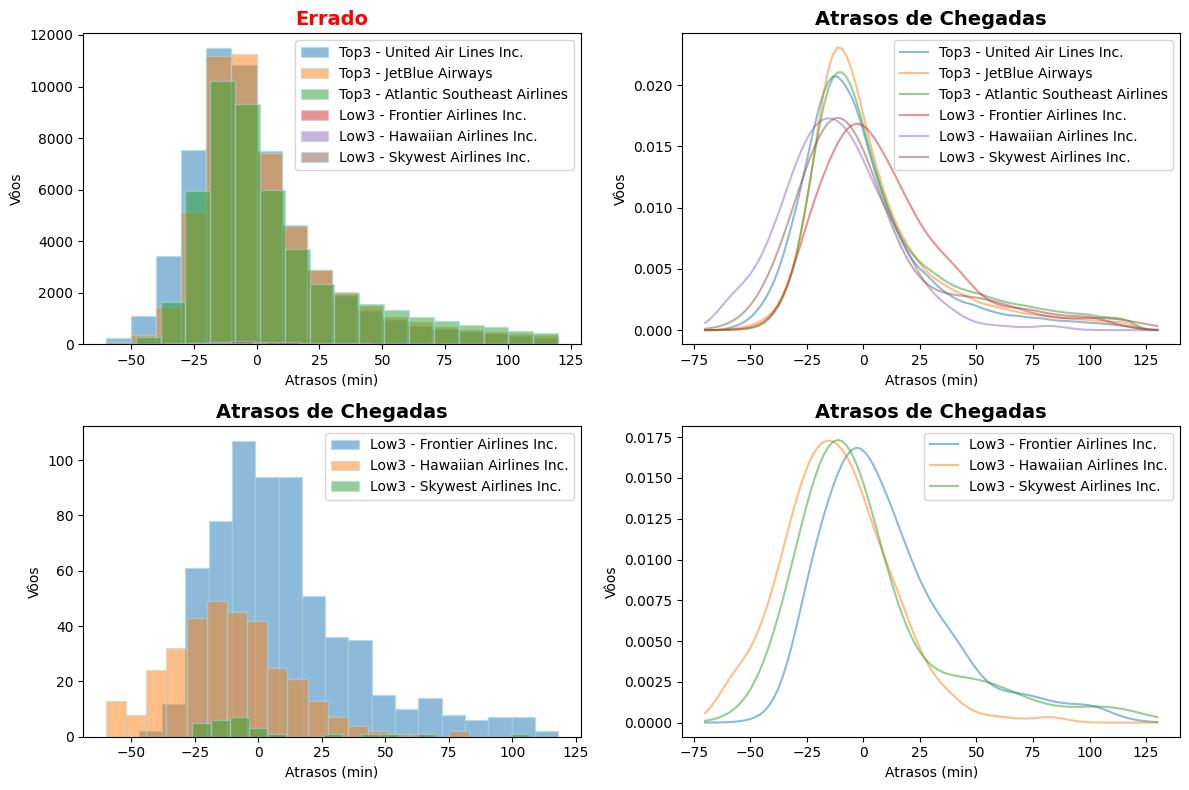

In [18]:
plt.figure(figsize=(12,8))

binwidth=10

plt.subplot(2,2,1)
for companhia in top3:
  plt.hist(flights[ flights.name == companhia ]['arr_delay'], bins=int(interval/binwidth), edgecolor = 'lightblue',alpha=0.5,label='Top3 - ' + companhia)
for companhia in low3:
  plt.hist(flights[ flights.name == companhia ]['arr_delay'], bins=int(interval/binwidth), edgecolor = 'lightblue',alpha=0.5,label='Low3 - ' + companhia)

# Anotações
plt.title('Errado', fontsize=14, weight='bold', color='r')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.legend()

def density(serie, xmin=0, xmax=100, intervals=100):
  density = kde.gaussian_kde(serie)
  x = np.linspace(xmin,xmax,100)
  y = density(x)
  return x, y

plt.subplot(2,2,2)
for companhia in top3:
  x, y = density(flights[ flights.name == companhia ]['arr_delay'],-70,130)
  plt.plot(x,y,alpha=0.5,label='Top3 - ' + companhia)
for companhia in low3:
  x, y = density(flights[ flights.name == companhia ]['arr_delay'],-70,130)
  plt.plot(x,y,alpha=0.5,label='Low3 - ' + companhia)

# Anotações
plt.title('Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.legend()

plt.subplot(2,2,3)
for companhia in low3:
  plt.hist(flights[ flights.name == companhia ]['arr_delay'], bins=int(interval/binwidth), edgecolor = 'lightblue',alpha=0.5,label='Low3 - ' + companhia)

# Anotações
plt.title('Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.legend()

def density(serie, xmin=0, xmax=100, intervals=100):
  density = kde.gaussian_kde(serie)
  x = np.linspace(xmin,xmax,100)
  y = density(x)
  return x, y

plt.subplot(2,2,4)
for companhia in low3:
  x, y = density(flights[ flights.name == companhia ]['arr_delay'],-70,130)
  plt.plot(x,y,alpha=0.5,label='Low3 - ' + companhia)

# Anotações
plt.title('Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.legend()

plt.tight_layout()
plt.show()

Como você pode ver o histograma falha em fornecer uma visualização adequada da distribuição de uma variável para várias categorias. Os gráficos de densidade de probabilidade são neste caso uma opção melhor, mas mesmo assim podem ficar obscuros para números de classes maiores. A redução das classes a serem exibidas pode ser uma alternativa, mas nos casos em que as distribuições são muitos semelhantes o resultado também não é muito bom, e você pode tentar reproduzir os dois últimos casos para as top3 companhias e ver o resultado.

Uma alternativa comum é empregar criarmos histogramas lado-a-lado e gráficos *empilhados* como mostramos a seguir.

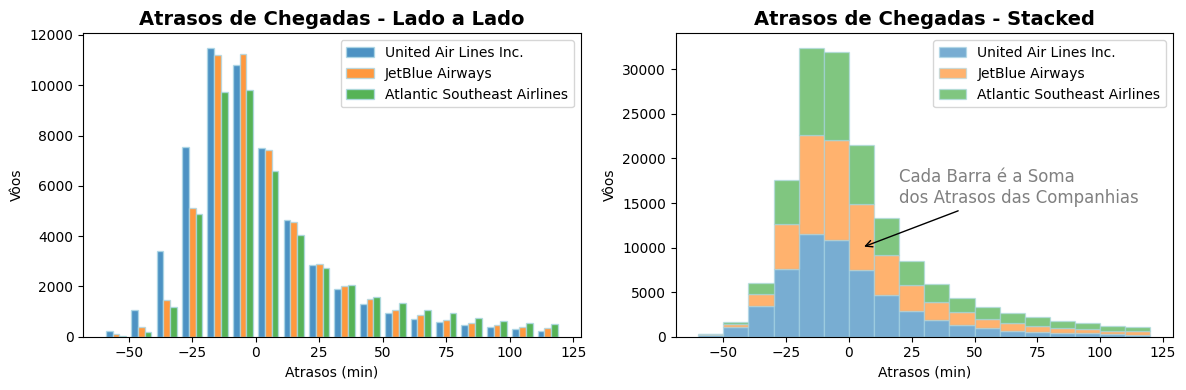

In [20]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
list_hist = []
for companhia in top3:
  list_hist.append(flights[ flights.name == companhia ]['arr_delay'])

plt.hist(list_hist, bins=int(interval/binwidth), edgecolor = 'lightblue',alpha=0.8, label=top3)

# Anotações
plt.title('Atrasos de Chegadas - Lado a Lado', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.legend()

plt.subplot(1,2,2)
plt.hist(list_hist, bins=int(interval/binwidth), edgecolor = 'lightblue',alpha=0.6, label=top3, stacked=True)

# Anotações
plt.annotate('Cada Barra é a Soma\ndos Atrasos das Companhias',
             xy=(5, 10000),  # ponto do gráfico
             xytext=(20, 15000),   # posição do texto
             arrowprops=dict(arrowstyle="->"),
             fontsize=12,
             color='grey')

plt.title('Atrasos de Chegadas - Stacked', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.legend()

plt.tight_layout()
plt.show()

Ainda assim o resultado pode ser confuso sendo mais difícil à medida o número de classes aumenta. Para exibição lado a lado, parece ainda preferível empregar gráficos de barra exibindo as quantidades de cada classes e, para os gráficos empilhados, **cuidado**: você deve notar que os valores de cada barra são de fato **empilhados** e uma barra corresponde a **soma** dos valores de cada categoria.  

Evite, portanto, esse tipo de gráfico para o exame de muitas classes de dados. Tanto para análise exploratória como para a apresentação dos resultados é melhor fazer múltiplos gráficos examinando por partes as classes ou apresentando suas conclusões.  




## Cuidados ao se Combinar Gráficos

Obviamente, embora possamos a exibir várias classes de dados, os valores dessas classes devem sempre estar na mesma unidade. Assim, podemos exibir as distribuições dos tempos de atrasos (na unidade em minutos) de diferentes companhias. Mas faria pouco sentido exibir no mesmo gráfico distribuições dos tempos de atrasos e dos preços das passagens (em Reais ou outra unidade monetária).

Por outro lado, mais um cuidado deve ser tomado quando exibimos múltiplas classes em gráficos de densidade. Gráficos de densidade, sendo uma função de probabilidades, constroem os valores para que a área sob o gráfico tenha soma 1. E é necessário que você fique atento para fato de que, exibindo múltiplas classes, a soma será sobre a *área de cada uma das classes*. Assim, as probabilidades apresentarão valores bastante menores quando exibidas múltiplas classes. Não observar isso é um erro muito comum e você deve estar atento a isso.

> $\bigstar \text{  }$ *Fique atento. Exibindo múltiplas classes em gráficos de densidade de probabilidade a soma 1 corresponderá a área sob o gráfico de cada uma das classes e não em cada classe individual.*

<ipython-input-21-6b5f5c942d6f>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=flights[ flights.name.isin(low3) ], x='arr_delay', hue='name', shade=True, ax=axs[0])
<ipython-input-21-6b5f5c942d6f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=flights[ flights.name == low3[0] ], x='arr_delay', hue='name', shade=True, ax=axs[1])


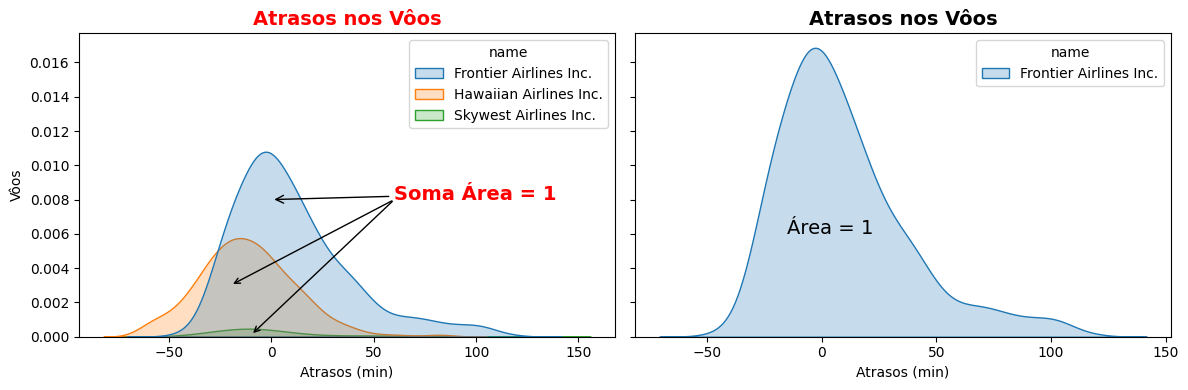

In [21]:
f, axs = plt.subplots(1,2,figsize=(12,4),sharey=True)

sns.kdeplot(data=flights[ flights.name.isin(low3) ], x='arr_delay', hue='name', shade=True, ax=axs[0])
axs[0].set_title('Atrasos nos Vôos', fontsize=14, weight='bold', color='r')
axs[0].set_xlabel('Atrasos (min)')
axs[0].set_ylabel('Vôos')

sns.kdeplot(data=flights[ flights.name == low3[0] ], x='arr_delay', hue='name', shade=True, ax=axs[1])
axs[1].set_title('Atrasos nos Vôos', fontsize=14, weight='bold')
axs[1].set_xlabel('Atrasos (min)')
axs[1].set_ylabel('Vôos')

# Anotações
axs[0].annotate('Soma Área = 1',
             xy=(0, 0.008),  # ponto do gráfico
             xytext=(60, 0.008),   # posição do texto
             arrowprops=dict(arrowstyle="->"),
             fontsize=14, color='r', weight='bold')
axs[0].annotate('',
             xy=(-20, 0.003),  # ponto do gráfico
             xytext=(60, 0.008),   # posição do texto
             arrowprops=dict(arrowstyle="->"))
axs[0].annotate('',
             xy=(-10, 0.0001),  # ponto do gráfico
             xytext=(60, 0.008),   # posição do texto
             arrowprops=dict(arrowstyle="->"))
axs[1].text(-15, 0.006, 'Área = 1', fontsize=14, color='k')


plt.tight_layout()
plt.show()

Essa mudança de valores no eixo y não ocorre quando exibimos um histograma ( frequência dos valores) e os mesmos valores são exibidos para uma ou mais classes.

## Empregando gráficos de barras para distribuições

Em muitos casos os gráficos de barras podem ser empregados no lugar de histogramas para exibir a distribuição dos dados. Para isso basta empregar as quantidades de cada classe de valores para a dimensão das barras. Gráficos de barras têm muitos outros usos e veremos mais sobre isso no capítulo Quantidades e Proporções. Mas aqui vale a pena explorarmos o uso desses gráfico para distribuições.

Existem muitas formas de se obter as quantidades ou a frequencia de valores de uma variável. Abaixo empregamos a função `np.histogram()`, mas qualquer outro método pode ser empregado. Como você pode notar obtemos o mesmo resultado com o `plt.hist()` e o `plt.bar()` obtendo adequadamente as quantidades dos valores.

In [22]:
gdoor = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/glassdoordata.csv')
gdoor.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


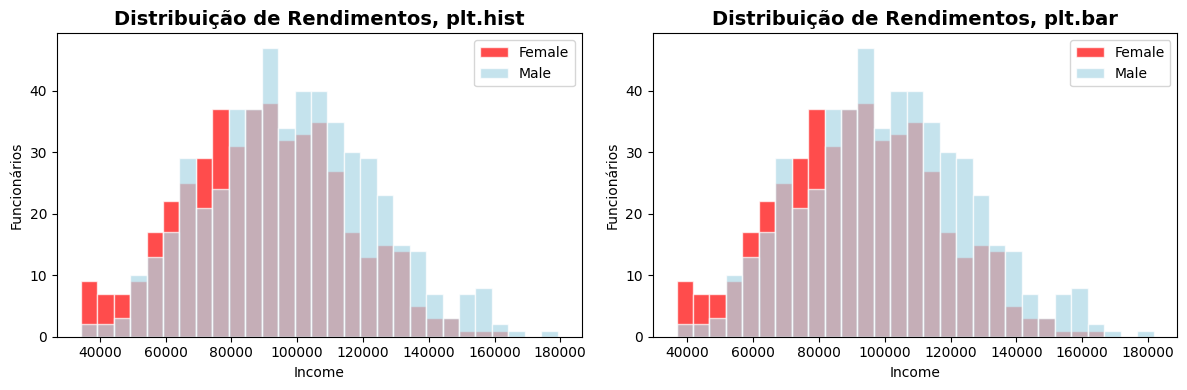

In [23]:
plt.figure(figsize=(12,4))
colors = {'Male':'lightblue', 'Female':'r'}
maxin, minin = gdoor.income.agg({'max','min'})

plt.subplot(1,2,1)

for sexo in gdoor.gender.unique():
  plt.hist(gdoor[gdoor.gender == sexo].income, bins=np.arange(minin,maxin,5000), edgecolor = 'white', label=sexo, color=colors[sexo], alpha=0.7)

# Anotações
plt.title('Distribuição de Rendimentos, plt.hist', fontsize=14, weight='bold')
plt.xlabel('Income')
plt.ylabel('Funcionários')
plt.legend()

plt.subplot(1,2,2)

for sexo in gdoor.gender.unique():
  h = np.histogram(gdoor[gdoor.gender == sexo].income, bins=np.arange(minin,maxin,5000))
  plt.bar(x=h[1][1:], height=h[0],  edgecolor = 'white', label=sexo, width=5000, color=colors[sexo], alpha=0.7)

# Anotações
plt.title('Distribuição de Rendimentos, plt.bar', fontsize=14, weight='bold')
plt.xlabel('Income')
plt.ylabel('Funcionários')
plt.legend()

plt.tight_layout()
plt.show()


## Gráficos Espelho

Um bom e popular uso dessa alternativa de empregarmos gráficos de barra para distribuições é quando queremos comparar a distribuição de apenas duas classes de dados obtendo *gráficos espelho* com abaixo.



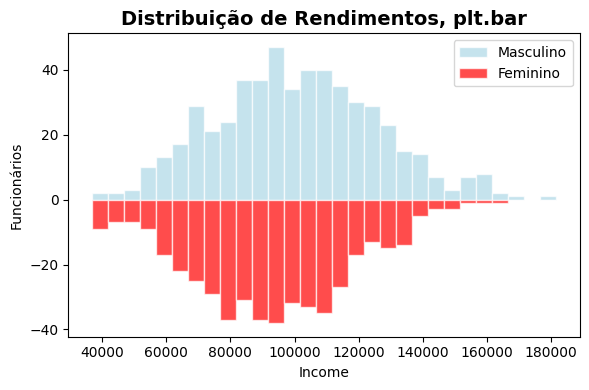

In [24]:
plt.figure(figsize=(6,4))

h = np.histogram(gdoor[gdoor.gender == 'Male'].income, bins=np.arange(minin,maxin,5000))
plt.bar(x=h[1][1:], height=h[0], edgecolor = 'white', label='Masculino', width=5000, color=colors['Male'], alpha=0.7)

h = np.histogram(gdoor[gdoor.gender == 'Female'].income, bins=np.arange(minin,maxin,5000))
plt.bar(x=h[1][1:], height= -1 * h[0],  edgecolor = 'white', label='Feminino', width=5000, color=colors['Female'], alpha=0.7)

# Anotações
plt.title('Distribuição de Rendimentos, plt.bar', fontsize=14, weight='bold')
plt.xlabel('Income')
plt.ylabel('Funcionários')
plt.legend()

plt.tight_layout()
plt.show()


E, mais comum ainda é empregarmos barras horizontais.

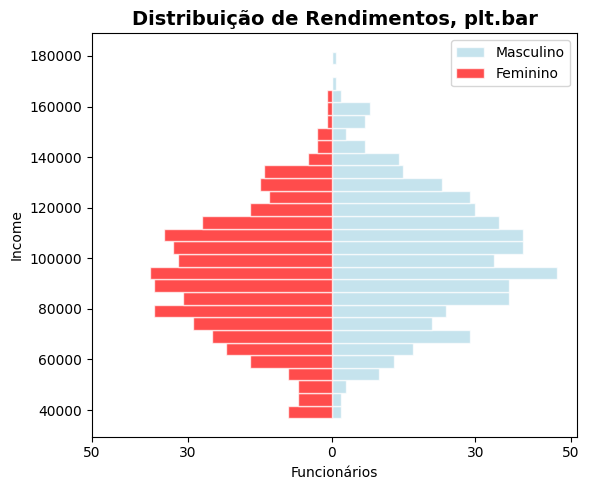

In [25]:
plt.figure(figsize=(6,5))

h = np.histogram(gdoor[gdoor.gender == 'Male'].income, bins=np.arange(minin,maxin,5000))
plt.barh(y=h[1][1:], width=h[0],  edgecolor = 'white', label='Masculino', height=5000, color=colors['Male'], alpha=0.7)

h = np.histogram(gdoor[gdoor.gender == 'Female'].income, bins=np.arange(minin,maxin,5000))
plt.barh(y=h[1][1:], width= -1 * h[0], edgecolor = 'white', label='Feminino', height=5000, color=colors['Female'], alpha=0.7)

# Anotações
plt.title('Distribuição de Rendimentos, plt.bar', fontsize=14, weight='bold')
plt.ylabel('Income')
plt.xlabel('Funcionários')
plt.legend()
plt.xticks(ticks=[-50,-30,0,30,50], labels=[50,30,0,30,50])

plt.tight_layout()
plt.show()

### Pirâmide Populacional

Esses gráficos espelho são tão comuns na análise de dados populacionais que acabam até ganhando uma designação própria. **Pirâmides populacionais** são empregadas para exibir a distribuição de valores como renda, idade e escolaridade, normalmente comparando a distribuição entre duas classes como sexo, raça ou etnia. Por serem tão comuns vale a pena aqui, além da forma simples que empregamos acima, você explorar a construção dessa forma de visualização empregando a interface de objetos do `Matplotlib`.

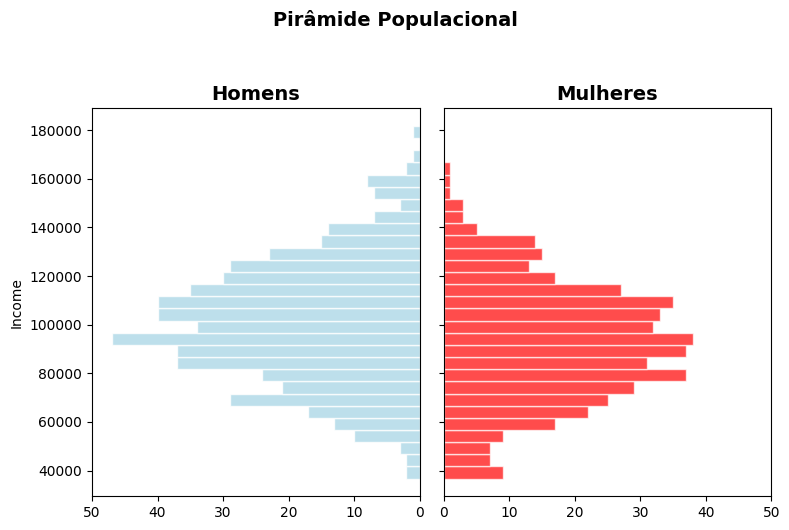

In [26]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(8, 5))

fig.suptitle('Pirâmide Populacional', fontsize=14, weight='bold', y=1.05)

h1 = np.histogram(gdoor[gdoor.gender == 'Male'].income, bins=np.arange(minin,maxin,5000))
h2 = np.histogram(gdoor[gdoor.gender == 'Female'].income, bins=np.arange(minin,maxin,5000))
y = h1[1][1:]
x_male = h1[0]
x_female = h2[0]


axes[0].barh(y, x_male, align='center',edgecolor = 'white', height=5000, color=colors['Male'], alpha=0.8)
axes[0].set_title('Homens', fontsize=14, weight='bold')
axes[1].barh(y, x_female, align='center', edgecolor = 'white', height=5000, color=colors['Female'], alpha=0.7)
axes[1].set_title('Mulheres', fontsize=14, weight='bold')

axes[0].set_xlim([0,50])
axes[1].set_xlim([0,50])

axes[0].set_ylabel('Income')
axes[0].invert_xaxis()

plt.tight_layout()
plt.show()

## Gráficos de Caixa, `Boxplot`

Gráficos de Caixa ou `Boxplot` foram introduzidos por nos anos 70 por John Tukey e são uma forma sintética de representar distribuições dos dados a partir unicamente dos quartis dos valores. Os quartis, você deve lembrar, são os valores dos dados ordenados em ordem crescente, que dividem a distribuição em quatro partes iguais $(0, 25\%, 50\%, 75\%, 100\%)$, correspondendo assim aos valores $(mínimo, Q1, mediana, Q3, máximo)$. Esses valores fornecem uma representação útil, embora bastante resumida, das distribuições dos dados.

Os códigos a seguir empregam as funções de distribuição de probabilidades do pacote `SciPy` já empregadas aqui para gerar distribuições $\chi 2$ e normal dos dados e exibirmos em seguida a relação entre os gráficos de densidade de probabilidade e os respectivos gráficos de caixa. O objetivo aqui é você compreender como interpretar um gráfico de caixa e seu relacionamento com o correspondente gráfico de distribuição. Mas deixo os códigos aqui apenas para o caso de você ter interesse específico na representação dessas distribuições e o uso do pacote `SciPy`.


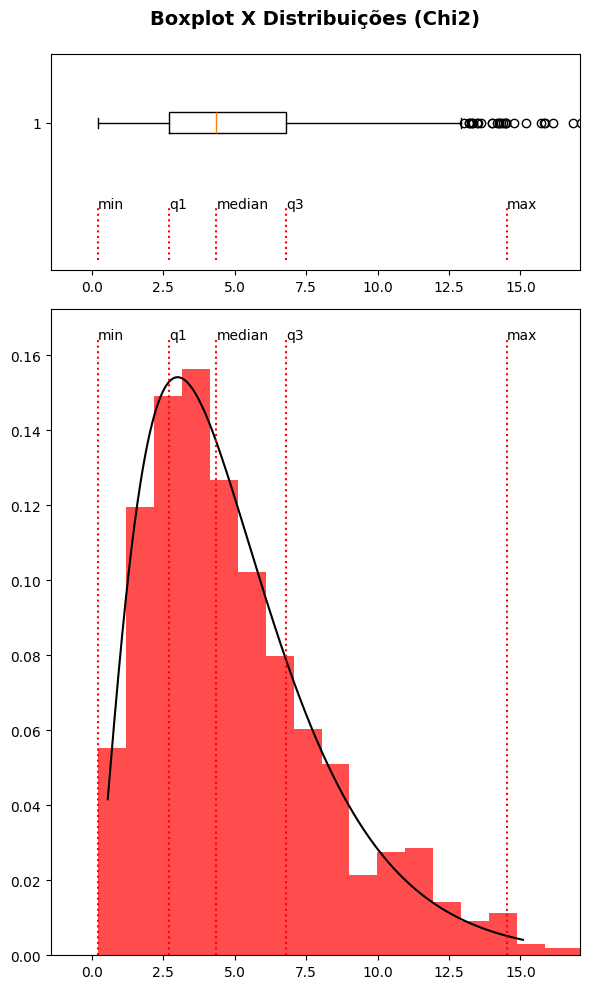

In [27]:
from scipy.stats import chi2, norm
np.random.seed(seed=1)

fig, (ax_box, ax_hist) = plt.subplots(2,  gridspec_kw={"height_ratios": (.25, .75)}, figsize=(6,10))

ax_box.set_title('Boxplot X Distribuições (Chi2)\n', fontsize=14, weight='bold')

# Produzindo dados de uma distribuição chi2
df = 5
rchi2 = chi2.rvs(df, size=1000)
x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 1000)

ax_box.boxplot(rchi2, vert=False)
ax_hist.plot(x, chi2.pdf(x, df), 'k-', label='chi2 pdf', lw=1.5)
ax_hist.hist(rchi2, density=True, bins=30, alpha=0.7, color='r')

ax_box.set_xlim([min(x) - 0.4*df, max(x) + 0.4*df])
ax_hist.set_xlim([min(x) - 0.4*df, max(x) + 0.4*df])

max_hist = ax_hist.get_ylim()[1]
max_box = ax_box.get_ylim()[1]

for q, label in zip([0,0.25,0.5,0.75,0.99],['min','q1','median','q3','max']):
  ax_hist.vlines(np.quantile(rchi2,q),0,max_hist,color='r',linestyles='dotted',lw=1.5)
  ax_box.vlines(np.quantile(rchi2,q),0,max_box/4,color='r',linestyles='dotted',lw=1.5)
  ax_hist.text(np.quantile(rchi2,q),max_hist,label)
  ax_box.text(np.quantile(rchi2,q),max_box/4,label)

plt.tight_layout()
plt.show()

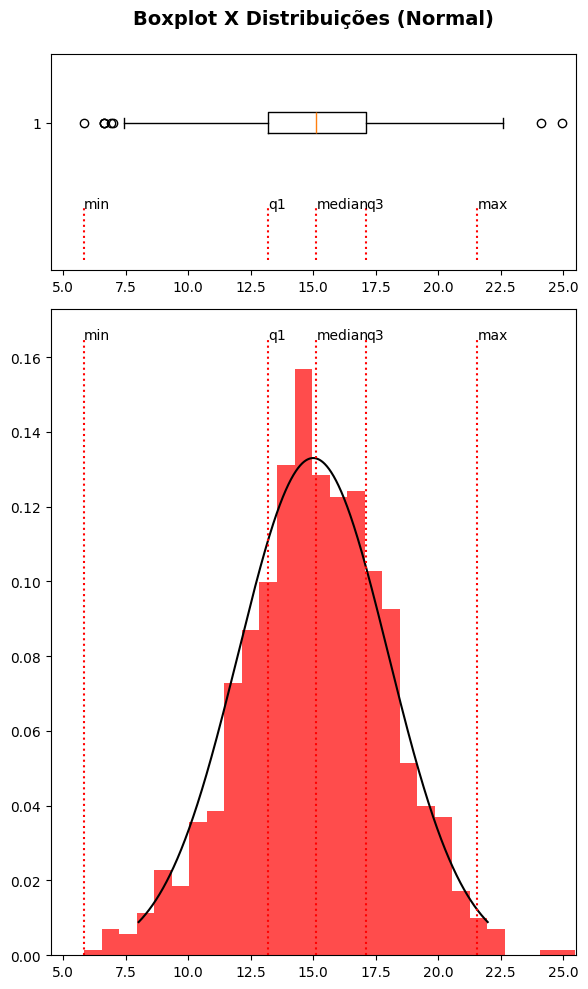

In [28]:
from scipy.stats import chi2, norm
np.random.seed(seed=1)

fig, (ax_box, ax_hist) = plt.subplots(2,  gridspec_kw={"height_ratios": (.25, .75)}, figsize=(6,10))

ax_box.set_title('Boxplot X Distribuições (Normal)\n', fontsize=14, weight='bold')

# Produzindo dados de uma distribuição normal
media = 15
sd = 3
rnorm = norm.rvs(loc=media,scale=sd,size=1000)
x = np.linspace(norm.ppf(0.01,loc=media,scale=sd), norm.ppf(0.99,loc=media,scale=sd), 1000)

ax_box.boxplot(rnorm, vert=False)
ax_hist.plot(x, norm.pdf(x,loc=media,scale=sd), 'k-', label='normal', lw=1.5)
ax_hist.hist(rnorm, density=True, bins=30,  alpha=0.7, color='r')

ax_box.set_xlim([media - 3.5*sd, media + 3.5*sd])
ax_hist.set_xlim([media - 3.5*sd, media + 3.5*sd])

max_hist = ax_hist.get_ylim()[1]
max_box = ax_box.get_ylim()[1]

for q, label in zip([0,0.25,0.5,0.75,0.99],['min','q1','median','q3','max']):
  ax_hist.vlines(np.quantile(rnorm,q),0,max_hist,color='r',linestyles='dotted',lw=1.5)
  ax_box.vlines(np.quantile(rnorm,q),0,max_box/4,color='r',linestyles='dotted',lw=1.5)
  ax_hist.text(np.quantile(rnorm,q),max_hist,label)
  ax_box.text(np.quantile(rnorm,q),max_box/4,label)

plt.tight_layout()
plt.show()

Embora bastante sintética, o gráfico de caixa é útil quando queremos exibir e comparar as distribuições de várias classes dados uma vez que, como vimos, os gráficos de distribuição podem se mostrar bastante confusos ao lidarmos com várias classes de dados.

Sendo um gráfico de distribuição o `boxplot(x)` exibe a caixa de valores dos quartis do conjunto de dados `x`, e para exibirmos gráficos de caixa de várias classes em um mesmo gráfico empregamos o parâmetro `positions=` para posicionar o gráfico de caixa de cada classe. Podemos, agora, comparar por exemplo a distribuição de atrasos de vôos entre várias companhias em um único gráfico.


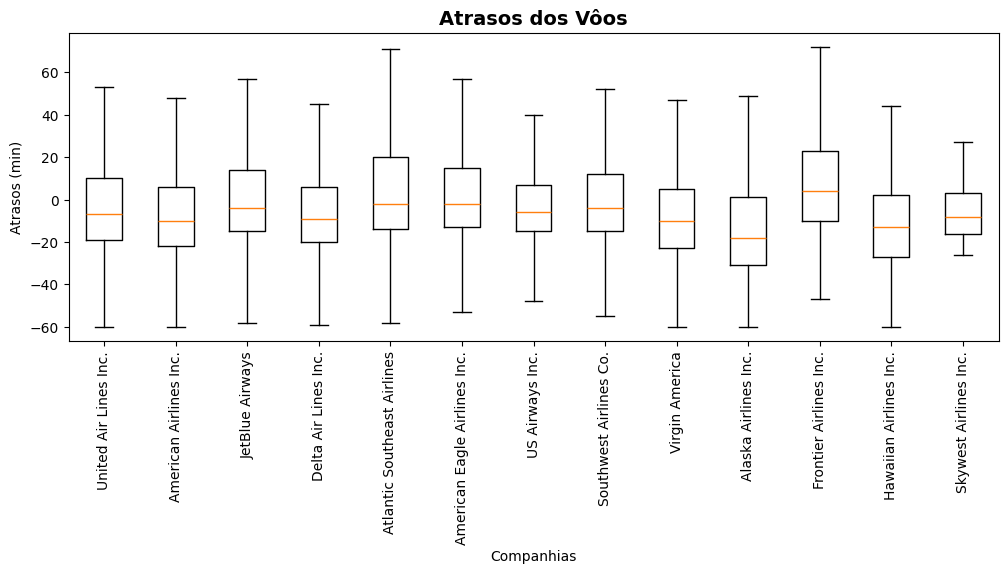

In [36]:
plt.figure(figsize=(12,4))

for i, companhia in enumerate(flights.name.unique()):
  plt.boxplot(flights[ flights.name == companhia ]['arr_delay'],positions=[i], showfliers=False, widths=0.5)

plt.title('Atrasos dos Vôos', fontsize=14, weight='bold')
plt.ylabel('Atrasos (min)')
plt.xlabel('Companhias')

plt.xticks(ticks=range(0,len(flights.name.unique())),labels=flights.name.unique(),rotation=90)
plt.show()

O `Matplotlib` fornece uma série de ornamentos que podemos empregar para as caixas dessa representação. Empregamos alguns desses recursos e utilizamos eles também para destacar as duas companhias com maior dispersão de atrasos de vôos, recursos que podem ser utilizados para melhor comunicar ou enfatizar as visualizações e análises dos dados.

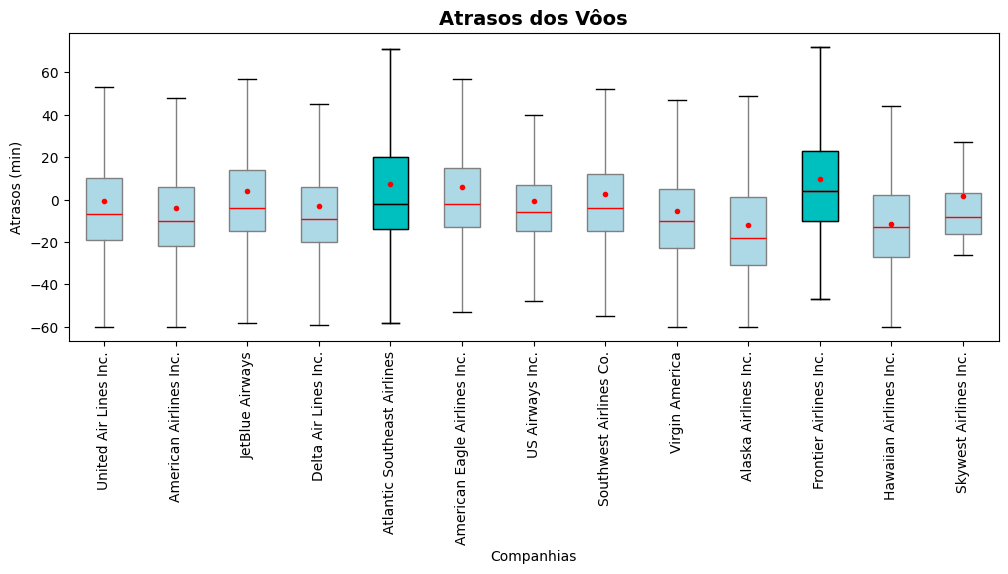

In [39]:
plt.figure(figsize=(12,4))

for i, companhia in enumerate(flights.name.unique()):
   plt.boxplot(flights[ flights.name == companhia ]['arr_delay'],positions=[i],showfliers=False,
              widths=0.5,
              patch_artist=True,
              boxprops=dict(facecolor="lightblue", color="grey"),
              medianprops=dict(color="r"),
              capprops=dict(color="k"),
              whiskerprops=dict(color="grey"),
              showmeans=True,
              meanprops={"marker":"o",
                      "markerfacecolor":"r",
                      "markeredgecolor":"r",
                      "markersize":"3"})

plt.boxplot(flights[ flights.name == 'Atlantic Southeast Airlines' ]['arr_delay'],positions=[4],showfliers=False, widths=0.5,
            patch_artist=True,
            boxprops=dict(facecolor="c", color="k"),
            medianprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="k"))

plt.boxplot(flights[ flights.name == 'Frontier Airlines Inc.' ]['arr_delay'],positions=[10],showfliers=False, widths=0.5,
            patch_artist=True,
            boxprops=dict(facecolor="c", color="k"),
            medianprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="k"))

plt.title('Atrasos dos Vôos', fontsize=14, weight='bold')
plt.ylabel('Atrasos (min)')
plt.xlabel('Companhias')

plt.xticks(ticks=range(0,len(flights.name.unique())),labels=flights.name.unique(),rotation=90)
plt.show()

## Gráficos de Caixa no Tempo

Um uso muito comum desses gráficos é análise gráfica de ativos do mercado financeiro, particularmente a evolução do preço ações. Já vimos isso, em parte, em um exemplo no final do capítulo anterior. Uma ação ou índice da bolsa pode assumir vários valores ou longo do dia e do mês, e é útil para análise desses dados observar as diferentes distribuições dos dados ao longo do tempo. Nesse caso, cada dia ou mês, passa a corresponder a uma classe dos valores e é fácil ver que teremos inúmeras classes a exibir.  

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/sp500_ibov_2000.csv')
df = df[ df.Date > '2017-01-01']
df.head()

,Date,SP500,IBOV,YYYY-MM
4384,2017-01-02,NaN,59589.0,2017-01
4385,2017-01-03,2257.830078,61814.0,2017-01
4386,2017-01-04,2270.750000,61589.0,2017-01
4387,2017-01-05,2269.000000,62071.0,2017-01
4388,2017-01-06,2276.979980,61665.0,2017-01


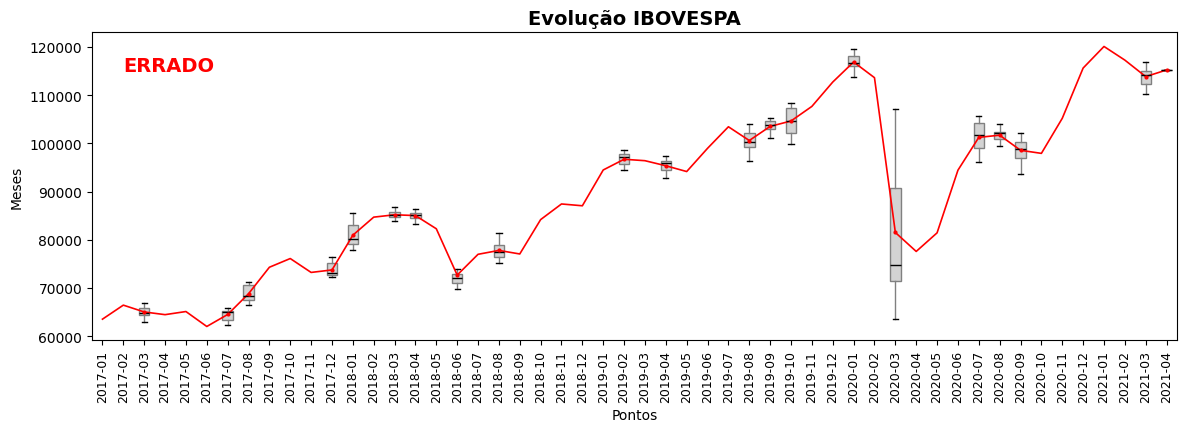

In [41]:
plt.figure(figsize=(14,4))

for i, yd in enumerate(df['YYYY-MM'].unique()):
  plt.boxplot(df[ df['YYYY-MM'] == yd ]['IBOV'],positions=[i],widths=0.5,showfliers=False,
            patch_artist=True,
            boxprops=dict(facecolor="lightgrey", color="grey"),
            medianprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="grey"),
            showmeans=True,
            meanprops={"marker":"o",
                      "markerfacecolor":"r",
                      "markeredgecolor":"r",
                      "markersize":"2"})

plt.plot(range(0,len(df['YYYY-MM'].unique())), df.groupby('YYYY-MM').IBOV.mean(),color='red',lw=1.2)

plt.title('Evolução IBOVESPA', fontsize=14, weight='bold')
plt.ylabel('Meses')
plt.xlabel('Pontos')

plt.text(1,115000,'ERRADO', c='r', fontsize=14, weight='bold')
plt.xticks(ticks=range(0,len(df['YYYY-MM'].unique())),labels=df['YYYY-MM'].unique(),rotation=90,fontsize=9)
plt.show()


### Valores Ausentes

No gráfico acima adicionamos ao gráfico de caixa o valor médio de cada mês, `showmeans=True` e os respectivos ornamentos dessa figura (`meanprops`), incluindo acima um `plot()` da linha de evolução desses valores como aprendemos no capítulo anterior. Esse um gráfico bastante semelhante ao que muitas ferramentas de negociação de ações utiliza.

Mas o quê há de errado no gráfico acima? Certamente você nota alguns meses onde não são exibidos os valores do gráfico de caixa. Certamente não há meses sem quaisquer negociações ou valores de ações. O que ocorre é que as estatísticas de quartis não podem ser calculadas na presença de valores nulos ou ausentes (`null`, NA etc.), algo bastante comum de encontrarmos quando lidamos com coleta de dados. Como existem datas para as quais não há negociação (feriados por exemplo) existem valores de cotação do índice ausentes e eles precisam ser removidos antes de exibirmos gráficos de caixa.

> $\bigstar \text{  }$ *Valores ausentes ou nulos precisam ser removidos antes de exibirmos gráficos de caixa, caso contrário as distribuições não serão exibidas.*

Há várias formas de se remover esses dados e empregamos abaixo o comando `dropna( )` do `Pandas`. Mas você pode empregar outras formas de fazer isso e existe existe até mesmo outros métodos para se lidar com dados faltantes como por exemplo imputar valores de média ou mediana.

In [42]:
df.dropna(inplace=True) # remove dados nulos ou ausentes

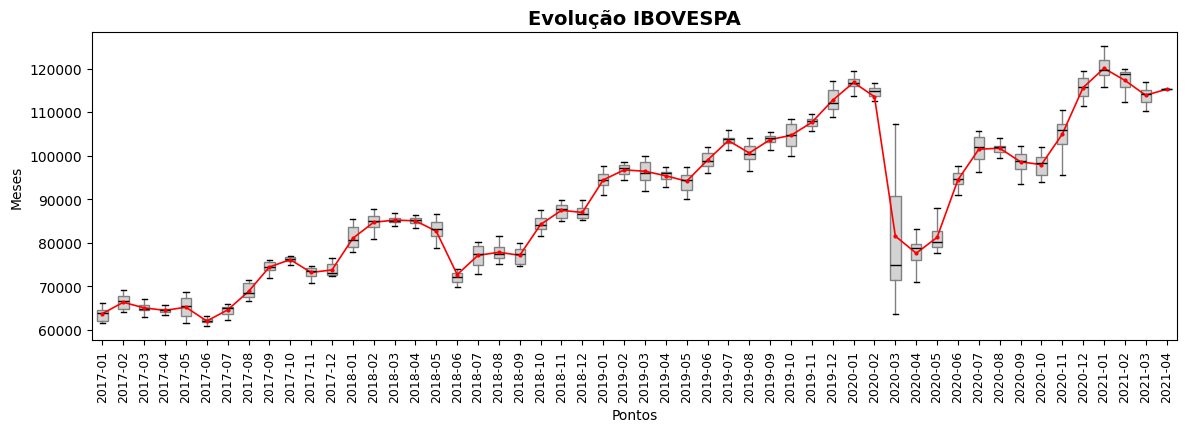

In [43]:
plt.figure(figsize=(14,4))

for i, yd in enumerate(df['YYYY-MM'].unique()):
  plt.boxplot(df[ df['YYYY-MM'] == yd ]['IBOV'],positions=[i],widths=0.5,showfliers=False,
            patch_artist=True,
            boxprops=dict(facecolor="lightgrey", color="grey"),
            medianprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="grey"),
            showmeans=True,
            meanprops={"marker":"o",
                      "markerfacecolor":"r",
                      "markeredgecolor":"r",
                      "markersize":"2"})

plt.plot(range(0,len(df['YYYY-MM'].unique())), df.groupby('YYYY-MM').IBOV.mean(),color='red',lw=1.2)

plt.title('Evolução IBOVESPA', fontsize=14, weight='bold')
plt.ylabel('Meses')
plt.xlabel('Pontos')

plt.xticks(ticks=range(0,len(df['YYYY-MM'].unique())),labels=df['YYYY-MM'].unique(),rotation=90,fontsize=9)
plt.show()


Depois da remoção dos dados ausentes vemos que o gráfico passa então a exibir corretamente os dados.

## Outliers

Vamos empregar o mesmo gráfico incluido o parâmetro `showfliers=True` para exibir o índice SP500 a partir de `2020-01-01`.



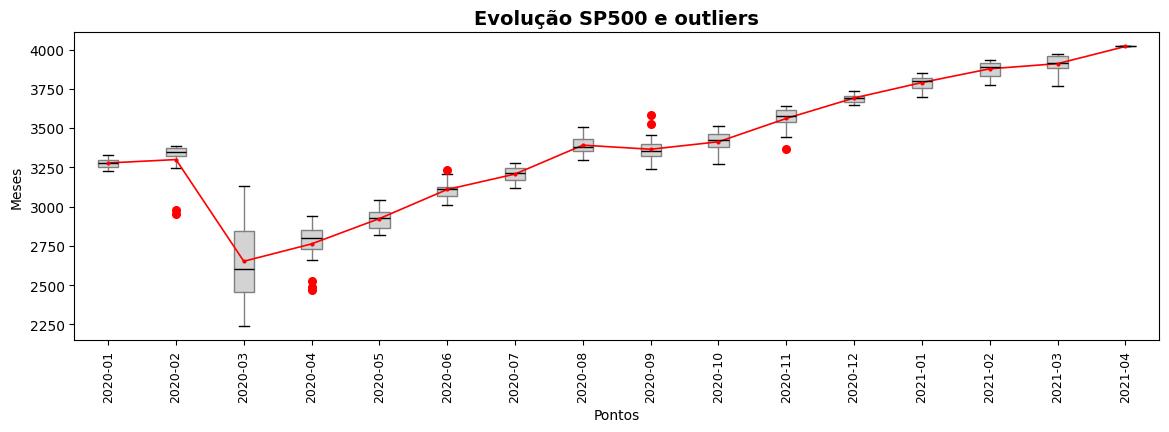

In [44]:
plt.figure(figsize=(14,4))

df = df[ df.Date > '2020-01-01']

for i, yd in enumerate(df['YYYY-MM'].unique()):
  plt.boxplot(df[ df['YYYY-MM'] == yd ]['SP500'],positions=[i],widths=0.3,showfliers=True,
            patch_artist=True,
            boxprops=dict(facecolor="lightgrey", color="grey"),
            medianprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="grey"),
            showmeans=True,
            meanprops={"marker":"o",
                      "markerfacecolor":"r",
                      "markeredgecolor":"r",
                      "markersize":"2"},
           flierprops=dict( markeredgecolor="r", markerfacecolor='r', markersize=5.5 ))

plt.plot(range(0,len(df['YYYY-MM'].unique())), df.groupby('YYYY-MM').SP500.mean(),color='red',lw=1.2)

plt.title('Evolução SP500 e outliers', fontsize=14, weight='bold')
plt.ylabel('Meses')
plt.xlabel('Pontos')

plt.xticks(ticks=range(0,len(df['YYYY-MM'].unique())),labels=df['YYYY-MM'].unique(),rotation=90,fontsize=9)
plt.show()


O parâmetro `showfliers=True` permite exibir nos gráficos de caixa os valores **outliers** dos dados, os dados discrepantes. Dados discrepantes podem ter um papel importante quando analisamos dados e a visualização fornece um modo bastante útil de identificarmos e percebermos o papel desses valores no conjunto dos dados. Empregamos ainda, no mesmo gráfico, algumas as propriedades desses pontos (`flierprops`) para dar destaque a esses valores.

### O que são esses Dados Discrepantes?

O intervalo interquartil é freqüentemente usado para se obter outliers dos dados. Outliers são definidos como observações que encontram-se abaixo de $Q1 - 1.5 IQR$ ou acima de $Q3 + 1.5 IQR$, onde $IQR$ (Inter Quartil Range) é a distância inter quartis $IQR = Q3 - Q1$ e são indicados no gráfico de caixa por pontos individuais acima e abaixo das extremidades do gráfico. Para distribuições normais o intervalo dos valores não discrepantes é bastante próxima a $[\bar{x} - 3 \sigma, \bar{x} + 3 \sigma]$, onde $\bar{x}$ e $\sigma$ são o valor médio e o desvio padrão, e em muitos casos práticos essa regra pode ser aplicada de modo equivalente.

Você pode ver a relação entre essas medidas, os gráficos de caixa e os outliers na abaixo para uma distribuição normal de dados.

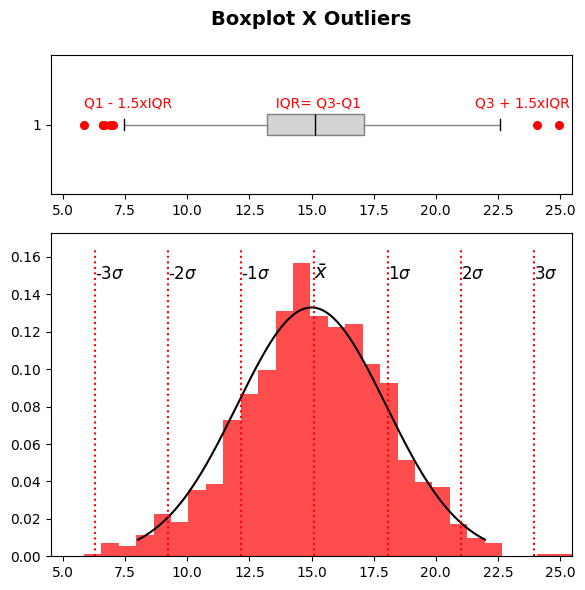

In [45]:
from scipy.stats import chi2, norm
np.random.seed(seed=1)

fig, (ax_box, ax_hist) = plt.subplots(2,  gridspec_kw={"height_ratios": (.3, .7)}, figsize=(6,6))

ax_box.set_title('Boxplot X Outliers\n', fontsize=14, weight='bold')

# Produzindo dados de uma distribuição normal
media = 15
sd = 3
rnorm = norm.rvs(loc=media,scale=sd,size=1000)
x = np.linspace(norm.ppf(0.01,loc=media,scale=sd), norm.ppf(0.99,loc=media,scale=sd), 1000)

ax_box.boxplot(rnorm, vert=False, showfliers=True,
            flierprops=dict( markeredgecolor="r", markerfacecolor='r', markersize=5.5 ),
            patch_artist=True,
            boxprops=dict(facecolor="lightgrey", color="grey"),
            medianprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="grey"))
ax_hist.plot(x, norm.pdf(x,loc=media,scale=sd), 'k-', label='normal', lw=1.5)
ax_hist.hist(rnorm, density=True, bins=30,  alpha=0.7, color='r')

ax_box.set_xlim([media - 3.5*sd, media + 3.5*sd])
ax_hist.set_xlim([media - 3.5*sd, media + 3.5*sd])

max_hist = ax_hist.get_ylim()[1]
max_box = ax_box.get_ylim()[1]

for q, label in zip([0,0.25,0.5,0.75,0.99],['Q1 - 1.5xIQR','  IQR= Q3-Q1','','','Q3 + 1.5xIQR']):
  ax_box.text(np.quantile(rnorm,q),3*max_box/4,label,color='r',fontsize=10)

max_hist = ax_hist.get_ylim()[1]

for s in [-3,-2,-1,1,2,3]:
  ax_hist.vlines(np.mean(rnorm) + s*np.std(rnorm),0,max_hist,color='r',linestyles='dotted',lw=1.5)
  ax_hist.text(np.mean(rnorm) + s*np.std(rnorm),0.9*max_hist, str(s) + '$\sigma$',fontsize=12)

ax_hist.vlines(np.mean(rnorm) ,0,max_hist,color='r',linestyles='dotted',lw=1.5)
ax_hist.text(np.mean(rnorm) ,0.9*max_hist, '$\\bar{x}$',fontsize=14)

plt.tight_layout()
plt.show()

## Histogramas 2D

Histogramas 2D não são muito comuns e são bastante difíceis de serem interpretados. O `Matplotlib` fornece a função `hist2d()` mas ela tem recursos limitados e não parece ser uma boa solução para esse tipo de representação dos dados. Como isso, poderíamos até dizer que a recomendação é a de não empregar esse tipo de gráfico sendo, as técnicas apresentadas, suficientes para  análises de distribuições de dados.

De qualquer modo, se de fato esse tipo de gráfico for útil para você (e são mesmo muito poucos problemas onde isso se aplica), é melhor empregar as funções do pacote `Seaborn`, mais fáceis de usar e com um resultado muito melhor que o `plt.hist2d()` do `Matplotlib` e, antes de tudo, esse exemplo vai nos ajudar a  explorar ainda mais a análise gráfica de distribuições de dados.

Histogramas 2D são bastante próximos às curvas de nível que exibem uma função de duas variáveis. A função aqui é a função de densidade de probabilidade das duas variáveis representadas pelos eixos $x$ e $y$.

Vamos selecionar alguns dados de indicadores de Países e, antes de exibir o gráfico 2D, explorar individualmente as distribuições de duas variáveis.

In [46]:
WHO = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHO = WHO[ WHO.Year == 2015 ][['Country', 'Year', 'Status', 'Life_expectancy', 'BMI',
                              'under-five deaths ', 'GDP', 'Population',
                              'Income composition of resources', 'Schooling']]
WHO.dropna(inplace=True)
WHO.head()

,Country,Year,Status,Life_expectancy,BMI,under-five deaths,GDP,Population,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,19.1,83,584.259210,33736494.0,0.479,10.1
16,Albania,2015,Developing,77.8,58.0,0,3954.227830,28873.0,0.762,14.2
32,Algeria,2015,Developing,75.6,59.5,24,4132.762920,39871528.0,0.743,14.4
48,Angola,2015,Developing,52.4,23.3,98,3695.793748,2785935.0,0.531,11.4
80,Argentina,2015,Developing,76.3,62.8,9,13467.123600,43417765.0,0.826,17.3


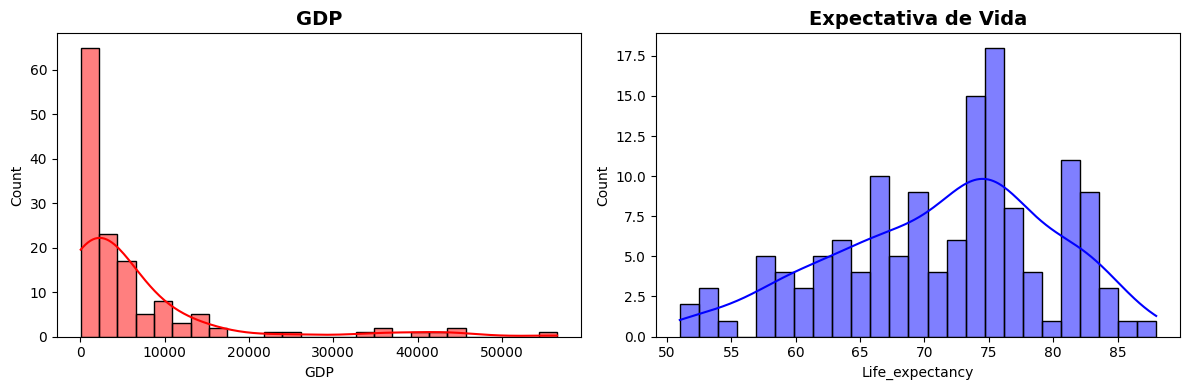

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=WHO, x='GDP', kde=True, color="red", ax=axs[0])
axs[0].set_title('GDP', fontsize=14, weight='bold')

sns.histplot(data=WHO, x='Life_expectancy', kde=True, color="blue", ax=axs[1], bins=25)
axs[1].set_title('Expectativa de Vida', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

Como você pode ver essas variáveis apresentam distribuições bastante distintas. Os dados de `GDP` (produto interno bruto por pessoa) tem uma assimetria negativa (calda a direita) enquanto `Life_expectancy` apresentar uma assimetria positiva (com calda a esquerda). Você pode ver ainda que a curva da estimativa do kernel de densidade de probabilidade apresenta um corte abruto em 0, uma vez que nenhum país pode apresentar `GDP` negativo.

Histogramas 2D buscam representar a distribuição conjunta dessas duas variáveis e podemos, para isso, empregar a mesma função `sns.histplot()` empregada antes, ou ainda a funçao `kdeplot()` para empregar o kernel de densidade estimado.

<ipython-input-48-e68af41dd235>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=WHO, x="GDP", y="Life_expectancy", shade=True, color='red', ax=axs[1],cbar=True)


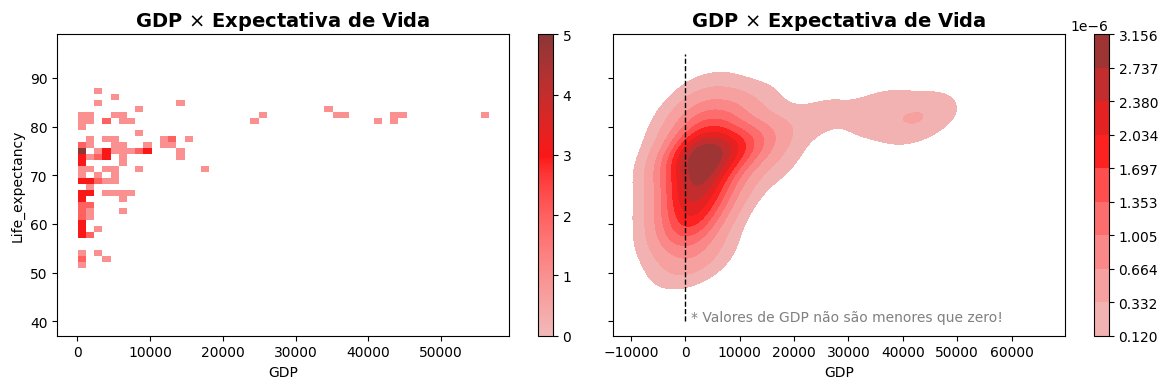

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

sns.histplot(data=WHO, x="GDP", y="Life_expectancy", color='red', bins=(50,30), ax=axs[0],cbar=True)
axs[0].set_title('GDP $\\times$ Expectativa de Vida', fontsize=14, weight='bold')

sns.kdeplot(data=WHO, x="GDP", y="Life_expectancy", shade=True, color='red', ax=axs[1],cbar=True)
axs[1].set_title('GDP $\\times$ Expectativa de Vida', fontsize=14, weight='bold')

axs[1].vlines(0,40,95,color='k',linestyle='dashed',lw=1)
axs[1].text(1000,40,'* Valores de GDP não são menores que zero!', color='grey')

plt.tight_layout()
plt.show()



O nível das cores representa os diferentes níveis de frequência de valores, ou de probabilidade, para cada ponto do plano, e você pode empregar o parâmetro `colbar` para exibir ou não a escala de valores. Os `bins` no histograma também podem ser diferentes para cada variável.

Note que com kernel de densidade estimado trás, como vimos antes nesse capítulo, valores de `GDP` que não podem existir de fato!

Um resultado melhor pode ser obtido pela função de nível de figura `sns.jointplot`, exibindo simultaneamente o gráfico 2D e as respectivas distribuições. Exibimos apenas a função de densidade, mas o mesmo gráfico pode ser feito para os histogramas empregando `kind='hist'`.


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


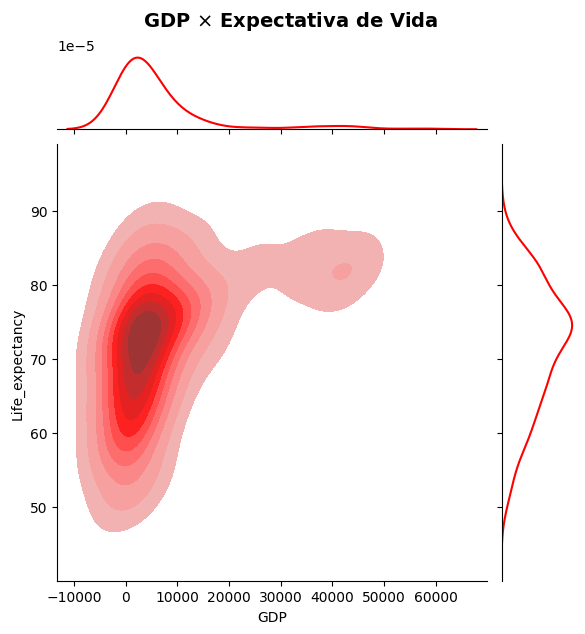

In [49]:
sns.jointplot(data=WHO, x="GDP", y="Life_expectancy", kind='kde',shade=True, levels=10, color='red')
# sns.jointplot(data=WHO, x="GDP", y="Life_expectancy", kind='hist', color='red')

plt.suptitle('GDP $\\times$ Expectativa de Vida', fontsize=14, weight='bold', y=1.05)
plt.show()


O gráfico acima segue com o defeito de apresentar falsos valores de `GDP`. Para distribuições do tipo de `GDP`, bastante comum para uma série de dados de renda, valores de imóveis e veículos etc. a transformação da variável com a função $log$ é comumente aplicada, incluindo no cálculo de modelos de regressão como veremos mais adiante no capítulo de Relações. Aplicando essa transformação você pode então obter um resultado melhor.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


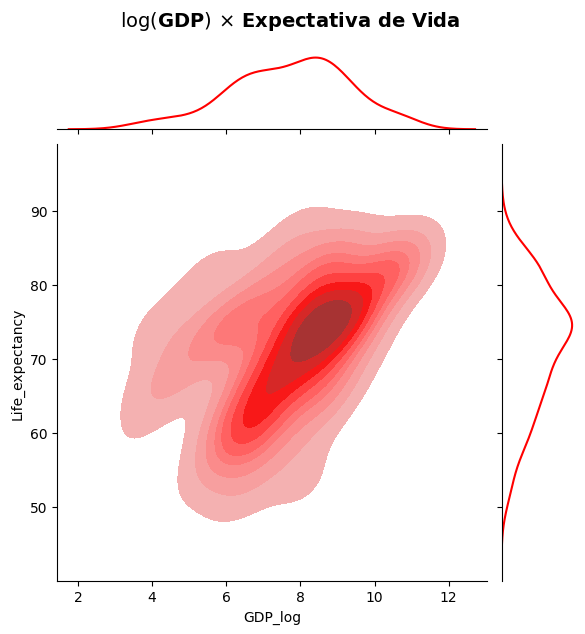

In [50]:
WHO['GDP_log'] = np.log(WHO.GDP)

sns.jointplot(data=WHO, x="GDP_log", y="Life_expectancy", kind='kde',shade=True, levels=10, color='red')

plt.suptitle('$\log($GDP$)$ $\\times$ Expectativa de Vida', fontsize=14, weight='bold', y=1.05)
plt.show()


Mas um uso mais interessante desses gráficos quando explorarmos mais de uma classe de dados é a possibilidade de distinguirmos diferentes grupos de dados ou *clusters*. Podemos, então, empregar o parâmetro `hue` para gerar o mesmo gráfico para as classes distintas de países desenvolvidos e em desenvolvimento e observar a diferença entre os dois grupos e a distinção entre essas duas classes de dados.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


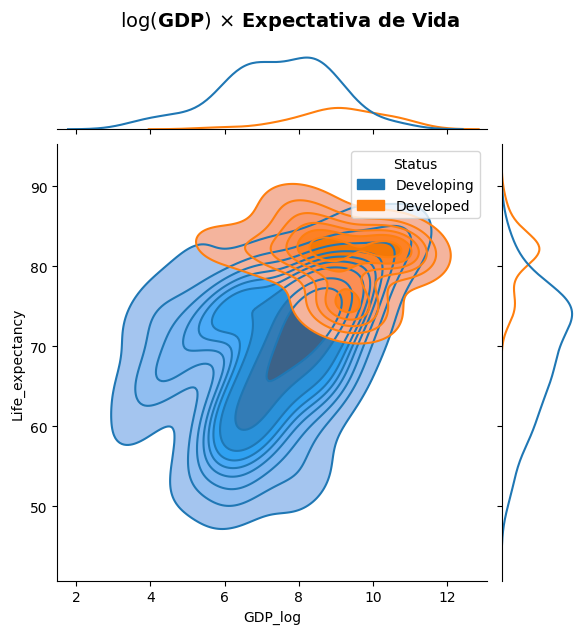

In [51]:
WHO['GDP_log'] = np.log(WHO.GDP)

g = sns.jointplot(data=WHO, x="GDP_log", y="Life_expectancy", hue="Status", kind='kde')
g.plot_joint(sns.kdeplot, shade=True)

plt.suptitle('$\log($GDP$)$ $\\times$ Expectativa de Vida', fontsize=14, weight='bold', y=1.05)
plt.show()